In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df1 = pd.read_csv('./202407-citibike-tripdata/202407-citibike-tripdata_1.csv')
df2 = pd.read_csv('./202407-citibike-tripdata/202407-citibike-tripdata_2.csv')
df3 = pd.read_csv('./202407-citibike-tripdata/202407-citibike-tripdata_3.csv')
df4 = pd.read_csv('./202407-citibike-tripdata/202407-citibike-tripdata_4.csv')
df5 = pd.read_csv('./202407-citibike-tripdata/202407-citibike-tripdata_5.csv')

df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/255604804.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('./202407-citibike-tripdata/202407-citibike-tripdata_1.csv')
/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/255604804.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('./202407-citibike-tripdata/202407-citibike-tripdata_2.csv')
/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/255604804.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('./202407-citibike-tripdata/202407-citibike-tripdata_3.csv')
/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/255604804.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('./202407-citibik

# Warm-up Questions

## Question 1

In [3]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# duration in minutes
df['duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [4]:
# Eliminate rides that last more than 3 hours and reset the index
df = df[df['duration'] <= 3*60].reset_index(drop=True)

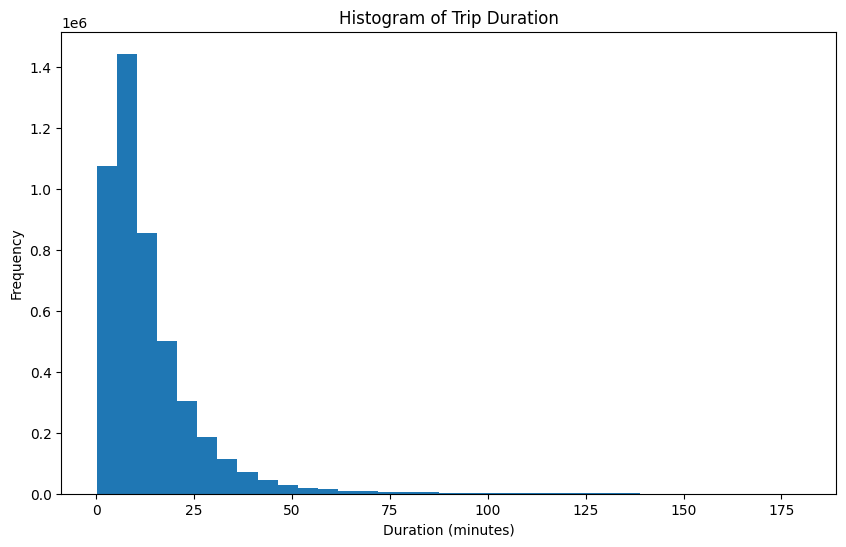

In [5]:
# Plot histogram of duration
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=35)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Duration')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


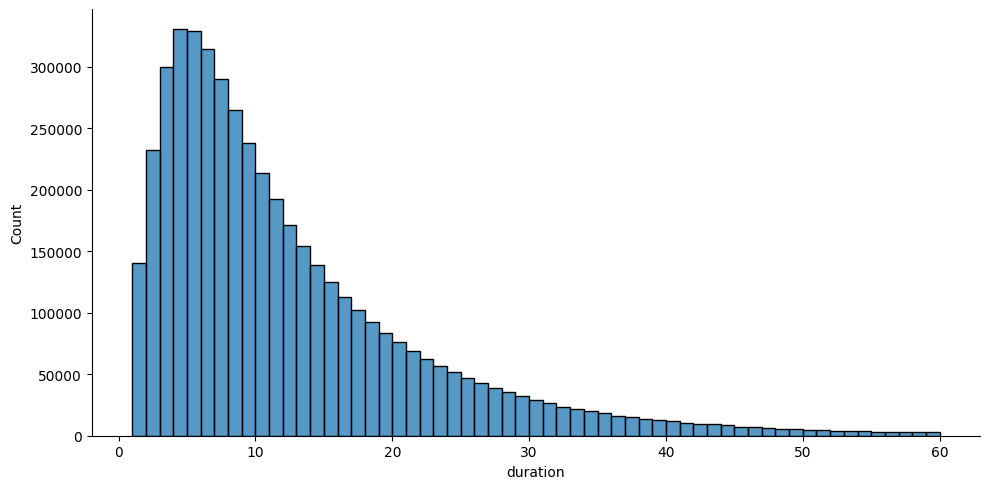

In [6]:
# Plot histogram of duration on 1-60 scale
sns.displot(data=df, x=df['duration'], bins=range(1,61), aspect=10/5)

## Question 2

In [7]:
# Expected ride duration
print("Mean ride duration: {:.2f}".format(np.mean(df['duration'])))

# Variance of ride duration
print("Variance ride duration: {:.2f}".format(np.var(df['duration'])))

# Probability greater than 20 minutes
prob20 = (len(df[df['duration']>20])/len(df))*100
print("Probability greater than 20 min (%): {:.2f}".format(prob20))

Mean ride duration: 13.42
Variance ride duration: 172.15
Probability greater than 20 min (%): 18.78


## Question 3

In [8]:
prob_member = len(df[df['member_casual']=='member'])/len(df)
prob_both = len(df[(df['member_casual'] == 'member') & (df['duration'] > 20)]) / len(df)
prob_conditional3 = prob_both/prob_member
print("Probability that the ride duration is greater than 20 min conditioning on the fact that the user is a CitiBike member (%): {:.2f}".format(prob_conditional3*100))

Probability that the ride duration is greater than 20 min conditioning on the fact that the user is a CitiBike member (%): 14.93


## Question 4

In [9]:
prob_more25 = len(df[df['duration']>25])/len(df)
prob_member_more25 = len(df[(df['member_casual'] == 'member') & (df['duration'] > 25)]) / len(df)
prob_conditional4 = prob_member_more25/prob_more25
print("Probability that ride belongs to CitiBike member, given that ride is more than 25 min (%): {:.2f}".format(prob_conditional4*100))

Probability that ride belongs to CitiBike member, given that ride is more than 25 min (%): 57.41


## Question 5

In [10]:
electric_dur = df[df['rideable_type']=='electric_bike']['duration']
classic_dur = df[df['rideable_type']=='classic_bike']['duration']

In [11]:
exp_electric = np.mean(electric_dur)
exp_classic = np.mean(classic_dur)
print("Expected ride duration of electric bikes: {:.2f}".format(exp_electric))
print("Expected ride duration of classic bikes: {:.2f}".format(exp_classic))

Expected ride duration of electric bikes: 13.78
Expected ride duration of classic bikes: 12.74


## Question 6

In [12]:
prob_less10 = len(df[df['duration']<10])/len(df)
prob_electric_less10 = len(df[(df['rideable_type'] == 'electric_bike') & (df['duration'] < 10)]) / len(df)
prob_classic_less10 = len(df[(df['rideable_type'] == 'classic_bike') & (df['duration'] < 10)]) / len(df)
print("Probability using electric bike, given duration <10 min (%): {:.2f}".format((prob_electric_less10/prob_less10)*100))
print("Probability using classic bike, given duration <10 min (%): {:.2f}".format((prob_classic_less10/prob_less10)*100))

Probability using electric bike, given duration <10 min (%): 63.33
Probability using classic bike, given duration <10 min (%): 36.67


# Station Analysis

In [13]:
df['start hour']=df['started_at'].dt.hour.astype('category')
df['start day']=df['started_at'].dt.day.astype('category') 
df['weekday']=df['started_at'].dt.weekday.astype('category')
df['end hour']=df['ended_at'].dt.hour.astype('category')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='start hour', ylabel='count'>

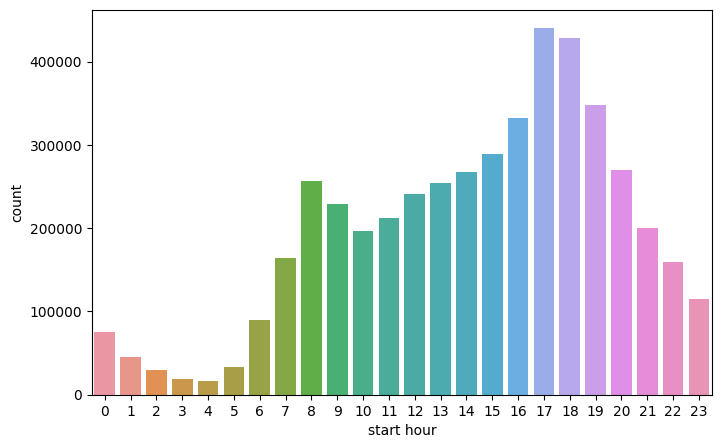

In [14]:
# Overall activity (for all days of the week)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=df['start hour'])

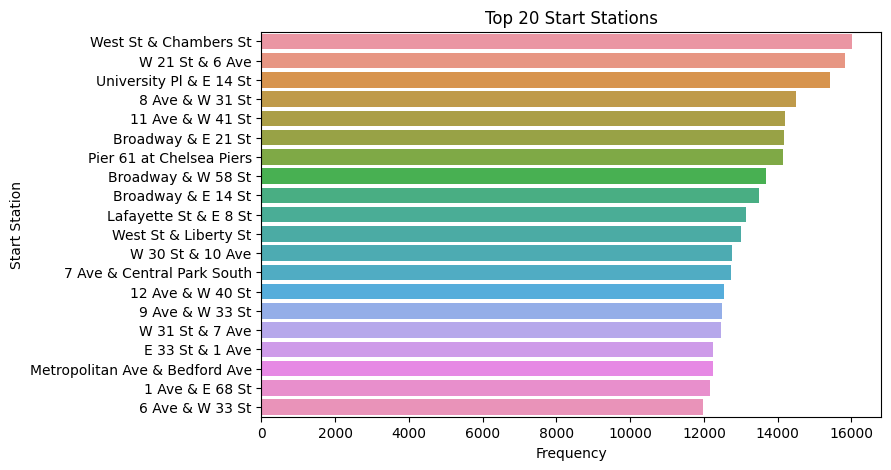

In [15]:
# Busiest stations overall
startstation = df['start_station_name'].value_counts()[:20]  # Top 20 start stations
plt.figure(figsize=(8, 5))
sns.barplot(x=startstation.values, y=startstation.index, orient="h")
plt.xlabel('Frequency')
plt.ylabel('Start Station')
plt.title('Top 20 Start Stations')
plt.show()

In [16]:
# Filter on weekdays only
df_weekdays = df[df['weekday'].isin(pd.Categorical([0, 1, 2, 3, 4]))]  # Weekdays: 0-4

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='start hour', ylabel='count'>

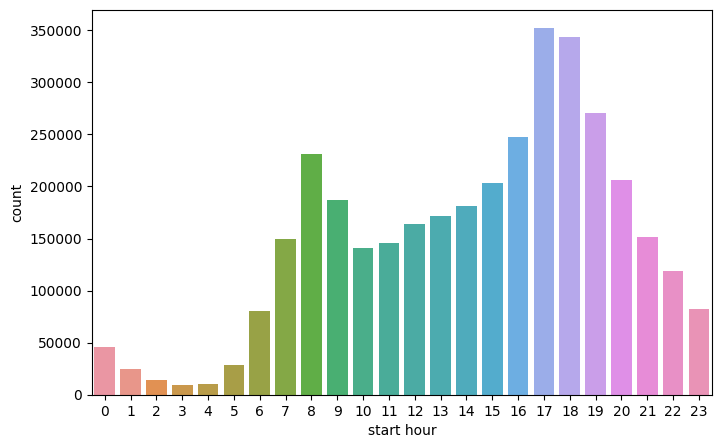

In [17]:
# Activity weekdays (ordered by starting hour)
plt.figure(figsize=(8,5))
sns.countplot(data=df_weekdays, x=df_weekdays['start hour'])

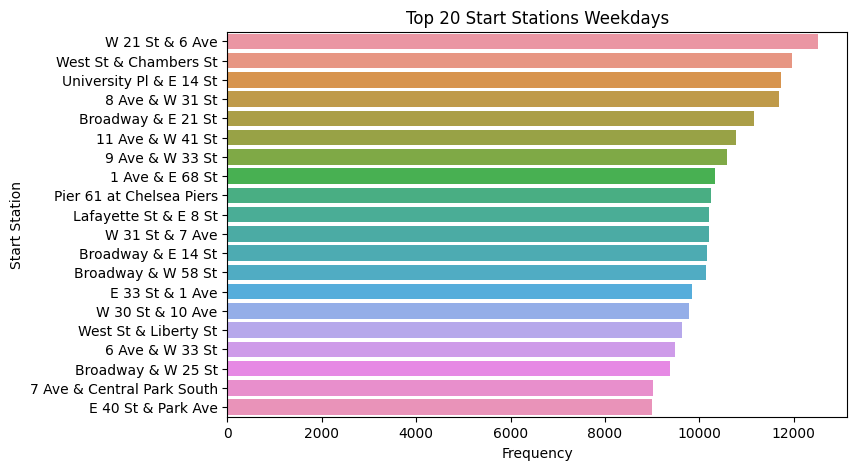

In [18]:
# Busiest stations weekdays (start)
startstation = df_weekdays['start_station_name'].value_counts()[:20]  # Top 20 start stations

plt.figure(figsize=(8, 5))
sns.barplot(x=startstation.values, y=startstation.index, orient="h")
plt.xlabel('Frequency')
plt.ylabel('Start Station')
plt.title('Top 20 Start Stations Weekdays')
plt.show()

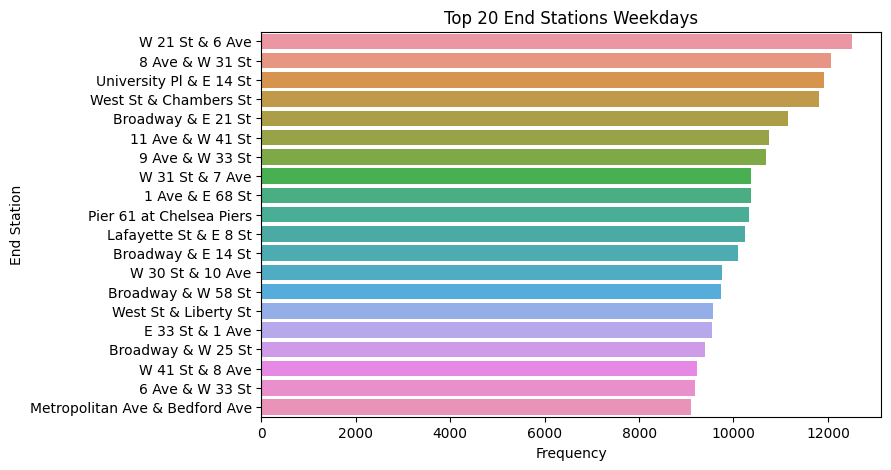

In [19]:
# Busiest stations weekdays (end)
endstation = df_weekdays['end_station_name'].value_counts()[:20]  # Top 20 end stations

plt.figure(figsize=(8, 5))
sns.barplot(x=endstation.values, y=endstation.index, orient="h")
plt.xlabel('Frequency')
plt.ylabel('End Station')
plt.title('Top 20 End Stations Weekdays')
plt.show()

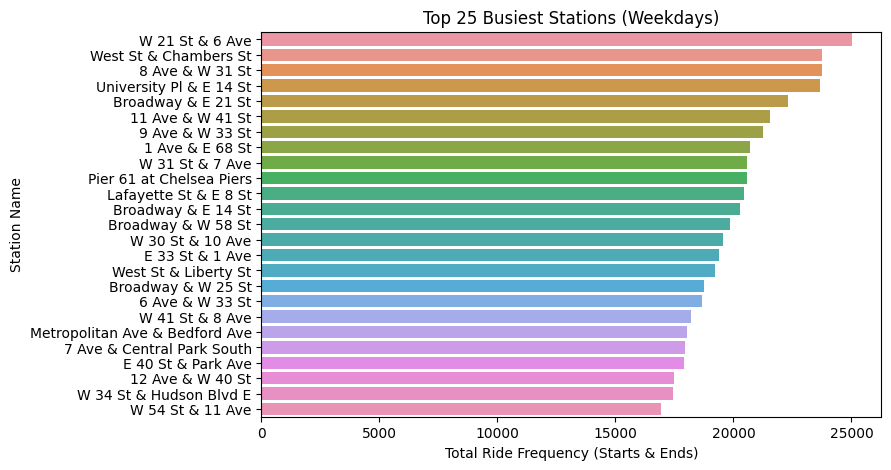

In [20]:
# Count frequencies for start and end stations - only weekdays
start_station = df_weekdays['start_station_name'].value_counts()
end_station = df_weekdays['end_station_name'].value_counts()

# Combine the frequencies, summing where station names overlap
combined_stations = start_station.add(end_station, fill_value=0).sort_values(ascending=False)[:25]

# Plot the combined data
plt.figure(figsize=(8, 5))
sns.barplot(x=combined_stations.values, y=combined_stations.index, orient="h")
plt.xlabel('Total Ride Frequency (Starts & Ends)')
plt.ylabel('Station Name')
plt.title('Top 25 Busiest Stations (Weekdays)')
plt.savefig('top25.png')
plt.show()

We want to get the stationary distribution of stations that show significantly different patterns. Analyze patterns of some of the busiest stations to decide on the final 3. - Dock capacity is retrieved from Google Maps (Sunday December 1st)

## Helper Functions

In [21]:
def station_plots(station):
    # Starting from specific station
    df_stat = df_weekdays[df_weekdays['start_station_name'] == station]

    # Activity weekdays (start)
    plt.figure(figsize=(8,5))
    plt.title(f'Trip Activity on Weekdays by Start at {station}')
    sns.countplot(data=df_stat, x=df_stat['start hour'])

    # Ending from specific station
    df_stat = df_weekdays[df_weekdays['end_station_name'] == station]

    # Activity weekdays (end)
    plt.figure(figsize=(8,5))
    plt.title(f'Trip Activity on Weekdays by End at {station}')
    sns.countplot(data=df_stat, x=df_stat['end hour'])
    
    # Filter both starting and ending from the station
    df_stat = df_weekdays[
        (df_weekdays['start_station_name'] == station) |
        (df_weekdays['end_station_name'] == station)
    ]

    # Create a DataFrame for start times
    df_start = df_stat[df_stat['start_station_name'] == station][['start hour']]
    df_start = df_start.rename(columns={'start hour': 'hour'})
    df_start['trip_type'] = 'start'

    # Create a DataFrame for end times
    df_end = df_stat[df_stat['end_station_name'] == station][['end hour']]
    df_end = df_end.rename(columns={'end hour': 'hour'})
    df_end['trip_type'] = 'end'
    
    # Concatenate start and end DataFrames
    df_combined = pd.concat([df_start, df_end])

    # Plot activity by hour with start/end differentiation
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_combined, x='hour', hue='trip_type')
    plt.title(f'Trip Activity on Weekdays by Start/End at {station}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Trips')
    plt.legend(title='Trip Type')
    plt.savefig(f'div_activity_{station}.png')
    plt.show()
    
    # Calculate total trips per hour
    total_trips = df_combined.groupby('hour').size().reset_index(name='total_trips')

    # Plot total trips
    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=total_trips,
        x='hour',
        y='total_trips',
        color='black',
        marker='o',
        linewidth=2
    )
    plt.title(f'Trip Activity on Weekdays (Total) at {station}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Total Number of Trips')
    plt.tight_layout()
    plt.savefig(f'total_activity_{station}.png')
    plt.show()

In [22]:
# Configure pd to display all rows and columns without boxes
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 10000)

def analyze_pattern(station, capacity, minutes, start_perc):
    # Create DataFrame for start activity (-1 indicates a bike leaves the station)
    df_start = df_weekdays[df_weekdays['start_station_name'] == station][['started_at', 'start_station_id']].assign(act=-1)

    # Create DataFrame for end activity (+1 indicates a bike docks at the station)
    df_end = df_weekdays[df_weekdays['end_station_name'] == station][['ended_at', 'end_station_id']].assign(act=1)

    # Rename columns to have consistent naming
    df_start.columns = ['docktime', 'station_id', 'act']
    df_end.columns = ['docktime', 'station_id', 'act']

    # Concatenate both DataFrames to get all activities at the specific station
    df_both = pd.concat([df_start, df_end])

    # Sort the values by time to track activity chronologically
    df_both.sort_values(by=['docktime'], inplace=True)

    #df_both.reset_index(drop=True, inplace=True)
    #print(df_both.head())
    
    # Start from the capacity on July 1st and use 'act' to update available bikes 
    df_both['available_bikes'] = int(capacity*start_perc) + df_both['act'].cumsum()

    # Plot the available bikes over time
    sns.set(font_scale=1)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_both, x='docktime', y='available_bikes')
    plt.xlabel('Time')
    plt.ylabel('Available Bikes')
    plt.title('Bike Availability Over Time')
    plt.savefig(f'availability_before_{station}')
    plt.show()

    # Plot the maximum of available bikes observed to see if it aligns with the capacity
    max_available = max(df_both['available_bikes'])
    print('Maximum number of available bikes: ', max_available) # Print max to analyze
    
    if minutes == 5:
        # Round down activity to the nearest 5-minute interval
        df_both['time_bin'] = df_both['docktime'].dt.floor('5T')
    elif minutes == 10:
        # Round down activity to the nearest 10-minute interval
        df_both['time_bin'] = df_both['docktime'].dt.floor('10T')

    # Aggregate by the desired time intervals
    aggregated_df = df_both.groupby('time_bin').agg({
        'station_id': 'first',
        'act': 'sum'
    }).reset_index()

    #print('\n Aggregated Frame')
    #print(aggregated_df.head())
    
    # Start with a certain bike availability (default is 100% of dock capacity)
    current_bikes = int(capacity*start_perc)

    # Create a list to store the state of the station as tuples (start, end)
    bike_states = []

    # Iterate over each row in the aggregated DataFrame
    for index, row in aggregated_df.iterrows():
        start_bikes = current_bikes # Record the starting number of bikes for the interval
        current_bikes += row['act'] # Adjust current number of bikes based on 'act' value

        # Ensure the number of bikes does not exceed capacity or drop below 0 (stay within [0, c_i])
        current_bikes = min(max(current_bikes, 0), capacity)
        # Record the ending number of bikes for the interval
        end_bikes = current_bikes

        # Append the tuple (start, end) to the bike_states list
        bike_states.append((start_bikes, end_bikes))

    # Add the bike_states list to the DataFrame as a new column
    aggregated_df['available_bikes_range'] = bike_states

    # Display updated DataFrame
    #print('\n Aggregated Frame with bike range')
    #print(aggregated_df.head(10))
    
    # Extract end of interval values
    aggregated_df['available_bikes_end'] = [state[1] for state in bike_states]

    # Plot the bike availability at the end of each interval
    sns.set(font_scale=1)
    plt.figure(figsize=(20, 5))
    ax = sns.lineplot(data=aggregated_df, x='time_bin', y='available_bikes_end')
    ax.set_xlabel('Time')
    ax.set_ylabel('Available Bikes')
    plt.title('Bike Availability at the End of Each Interval')
    plt.savefig(f'availability_after_{station}')
    plt.show()
    
    # morning (7:00 AM to 11:59 AM)
    df_morning = aggregated_df[aggregated_df['time_bin'].dt.hour.between(7, 11) & aggregated_df['time_bin'].dt.minute.between(0, 59)]

    # evening (12:00 PM to 8:00 PM)
    df_evening = aggregated_df[aggregated_df['time_bin'].dt.hour.between(12, 19)]
    
    return df_morning, df_evening

In [31]:
from scipy.linalg import solve

def get_stationary(df, capacity):
    # Count the occurrences of each state in the 'available_bikes_end' column
    value_counts = df['available_bikes_end'].value_counts().reset_index()

    # Rename the columns for clarity
    value_counts.columns = ['Available Bikes', 'Count']

    # Sort by the number of available bikes for better readability
    value_counts = value_counts.sort_values(by='Available Bikes').reset_index(drop=True)

    # Display the result
    #print(value_counts)
    
    # Initialize a matrix to count transitions (w_kl in report)
    transition_counts = np.zeros((capacity + 1, capacity + 1), dtype=int)

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        start, end = row['available_bikes_range']
        transition_counts[start, end] += 1

    # Normalize the matrix to get probabilities
    row_sums = transition_counts.sum(axis=1, keepdims=True)

    # Handle rows with no outgoing transitions (states that are not visited) -> this approach ensures stationary = 0
    zero_rows = row_sums == 0
    if np.any(zero_rows):
        print(f"States with no outgoing transitions: {np.where(zero_rows)[0]}")
        transition_counts[zero_rows.flatten()] = 1  # Assign uniform counts to these rows
        row_sums = transition_counts.sum(axis=1, keepdims=True)  # Recompute sums

    # Normalize the matrix
    transition_matrix = transition_counts / row_sums

    # Handle NaN values
    transition_matrix = np.nan_to_num(transition_matrix)

    transition_df = pd.DataFrame(
        transition_matrix,
        index=range(capacity + 1),
        columns=range(capacity + 1)
    )

    # Verify if all rows sum to 1
    row_sums = transition_df.sum(axis=1)
    all_rows_sum_to_one = np.allclose(row_sums, 1, atol=1e-6)

    if all_rows_sum_to_one:
        print("All rows sum to 1.")
    else:
        print("There are rows that do not sum to 1.")
        print("Rows with sum not equal to 1:")
        print(row_sums[row_sums != 1])

    # Number of states
    n_states = transition_matrix.shape[0]

    # Construct the matrix for the system of equations: (P^T - I)
    A = transition_matrix.T - np.eye(n_states)

    # Add the constraint that the sum of all pi's is 1
    A = np.vstack([A, np.ones(n_states)])
    b = np.zeros(n_states)
    b = np.append(b, 1)

    # Solve the linear system
    pi = solve(A.T @ A, A.T @ b)

    # Ensure non-negative values
    pi = np.clip(pi, 0, None)

    # Normalize to ensure the sum is exactly 1 (for floating-point deviations)
    pi /= pi.sum()

    #print("Stationary Distribution:", pi)

    # Find the min and max values and their indices
    min_value = pi.min()
    max_value = pi.max()
    min_index = pi.argmin()
    max_index = pi.argmax()
    print(f"Min value: {round(min_value, 3)}, at index: {min_index}") # Least chance to have this amount of bikes available
    print(f"Max value: {round(max_value, 3)}, at index: {max_index}") # Highest chance to have this amount of bikes available
    
    # for i in range(capacity + 1):
    #     print(f'pi_{i} = {round(pi[i], 3)}')
    
    return transition_matrix, pi

In [24]:
def plot_stationary_distribution(pi, station, capacity, time):
    states = list(range(capacity + 1)) # All states
    
    # Bar Plot for stationary distribution
    plt.figure(figsize=(8, 5))
    plt.bar(states, pi, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f"Stationary Distribution of States for {station} - {time}", fontsize=14)
    plt.xlabel("States", fontsize=12)
    plt.ylabel("Stationary Probability", fontsize=12)
    # Display every 5th state (readability)
    plt.xticks(ticks=range(0, len(states), max(1, len(states) // 20)), rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'stationary_plot_{station}_{time}.png')
    plt.show()

In [25]:
def plot_transition_matrix(transition_matrix, station, capacity, time):
    # Define ticks every 5th state
    tick_positions = list(range(0, capacity + 1, 5))
    tick_labels = [str(i) for i in tick_positions]

    plt.figure(figsize=(8, 5))
    sns.heatmap(
        transition_matrix,
        annot=False,
        cmap='YlGnBu',
        xticklabels=tick_labels,
        yticklabels=tick_labels,
        cbar_kws={'label': 'Transition Probability'}
    )

    plt.xticks(tick_positions, tick_labels, fontsize=10, rotation=45)
    plt.yticks(tick_positions, tick_labels, fontsize=10)
    plt.grid(visible=True, which='major', axis='both', color='gray', linestyle='--', linewidth=0.5)
    plt.title(f"Transition Probability Matrix for {station} - {time}", fontsize=16)
    plt.xlabel("End State", fontsize=12)
    plt.ylabel("Start State", fontsize=12)

    plt.tight_layout()
    plt.show()

In [26]:
def plot_comparison_stationary_distribution(pi1, pi2, station, capacity, time_period):
    states = list(range(capacity + 1))
    bar_width = 0.4
    x = range(len(states))
    plt.figure(figsize=(12, 6))
    
    # Bar plot for the first stationary distribution (5-minute aggregation)
    plt.bar(
        [pos - bar_width/2 for pos in x],
        pi1,
        width=bar_width,
        color='blue',
        alpha=0.7,
        edgecolor='black',
        label='5-Minute Aggregation'
    )
    
    # Bar plot for the second stationary distribution (10-minute aggregation)
    plt.bar(
        [pos + bar_width/2 for pos in x],
        pi2,
        width=bar_width,
        color='orange',
        alpha=0.7,
        edgecolor='black',
        label='10-Minute Aggregation'
    )
    
    plt.title(f"Comparison of Stationary Distributions for {station} - {time_period}", fontsize=14)
    plt.xlabel("States", fontsize=12)
    plt.ylabel("Stationary Probability", fontsize=12)
    plt.xticks(ticks=range(0, len(states), max(1, len(states) // 20)), rotation=45)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'stationary_comparison_{station}_{time_period}.png')
    plt.show()

# W 21 St & 6 Ave

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

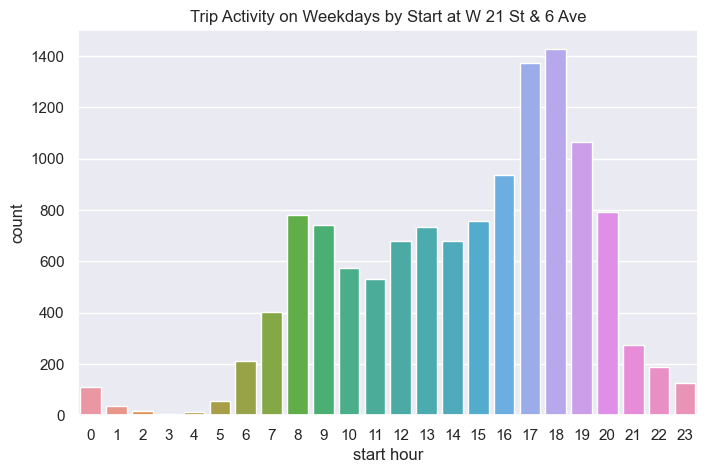

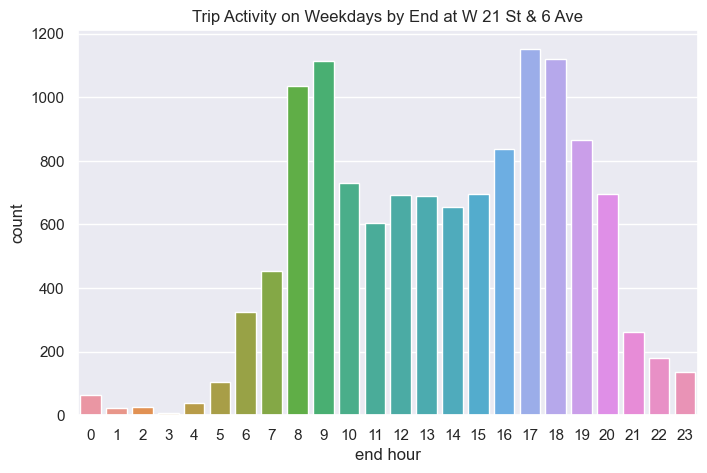

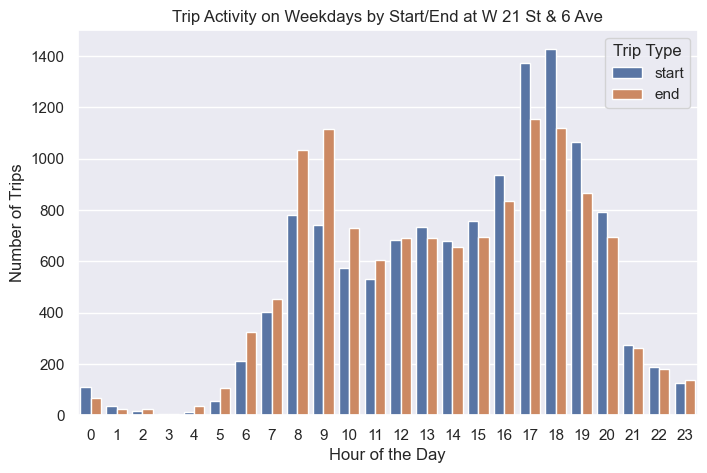

/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1702798834.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_trips = df_combined.groupby('hour').size().reset_index(name='total_trips')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', 

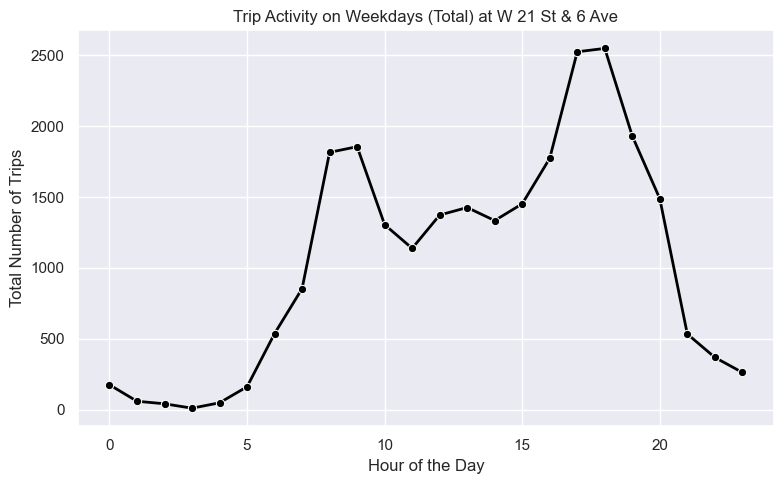

In [32]:
station = 'W 21 St & 6 Ave'
#Google : 70
capacity = 70
station_plots(station)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


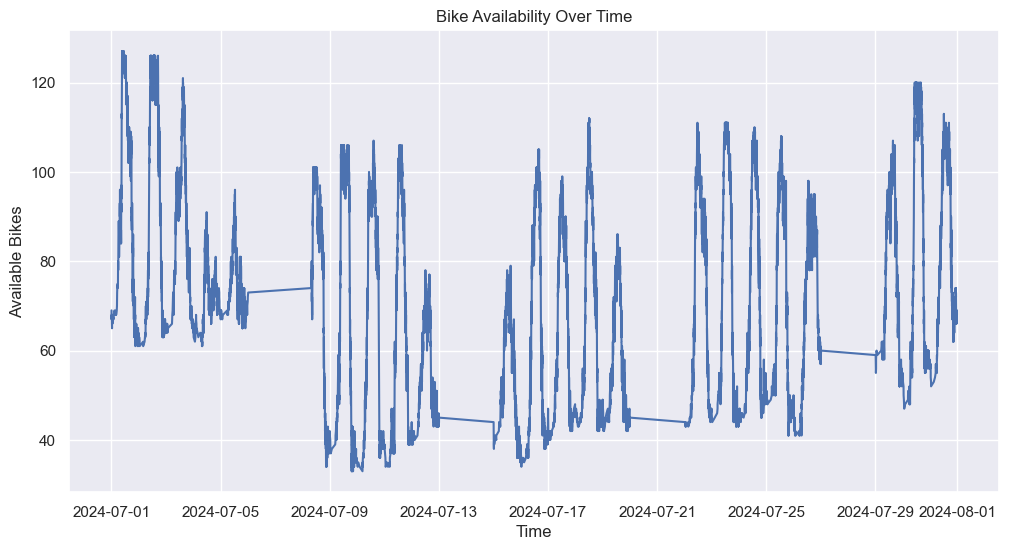

Maximum number of available bikes:  127


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('5T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


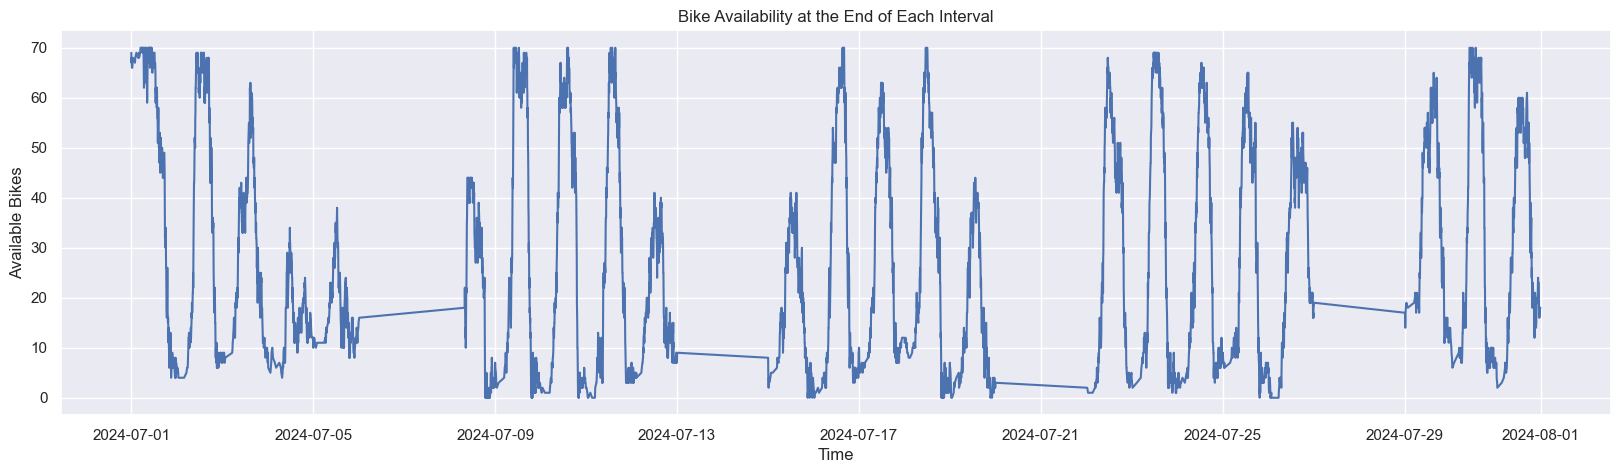

In [33]:
# Analyze pattern for 100% bike availability on July 1st & 5-minute aggregation
df_morning, df_evening = analyze_pattern(station, capacity, 5, 1.0)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


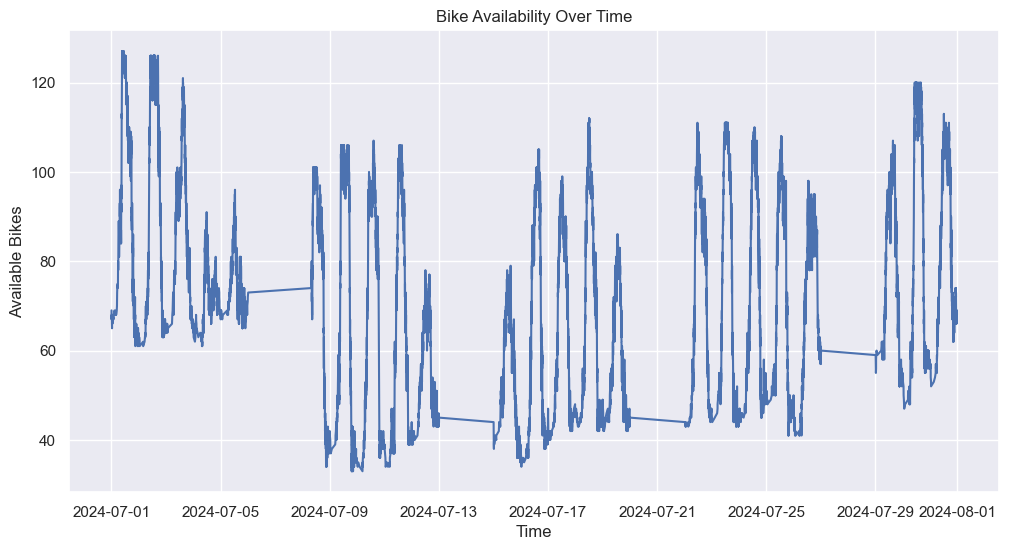

Maximum number of available bikes:  127


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:48: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('10T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


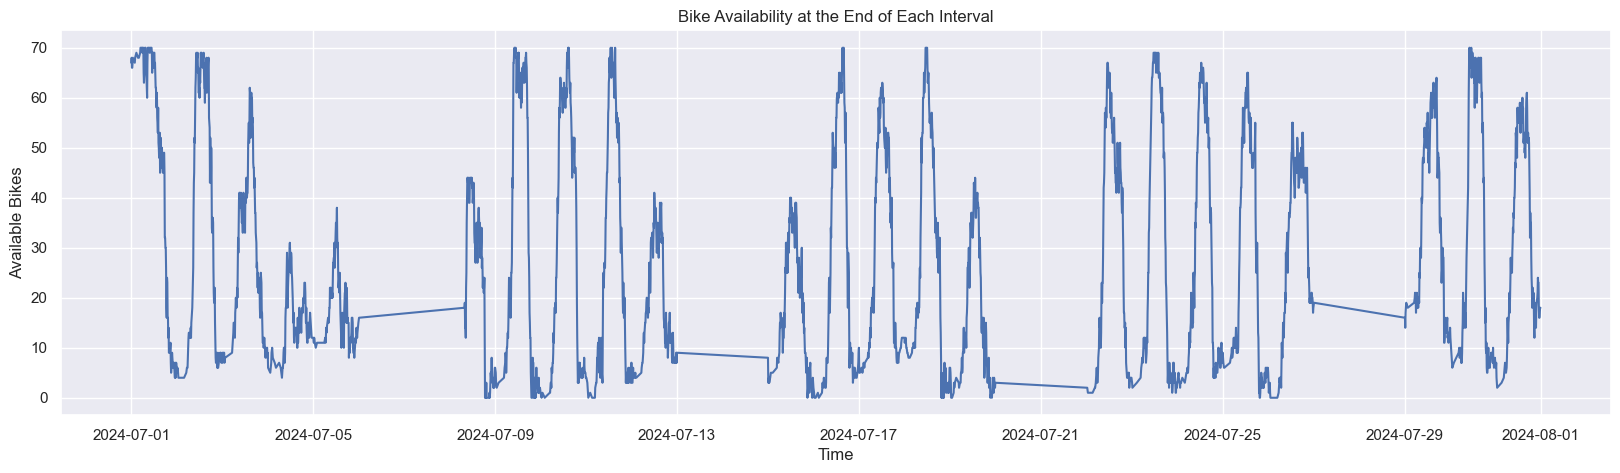

States with no outgoing transitions: [0 1]
All rows sum to 1.
Min value: 0.0, at index: 0
Max value: 0.258, at index: 70


In [34]:
# Analyze pattern for 10-minute aggregation
df_morning2, df_evening2 = analyze_pattern(station, capacity, 10, 1.0)
matrix2, pi2 = get_stationary(df_morning2, capacity)

In [35]:
# Get transition matrix and stationary distribution - morning
matrix, pi = get_stationary(df_morning, capacity)

States with no outgoing transitions: [0 1]
All rows sum to 1.
Min value: 0.0, at index: 1
Max value: 0.213, at index: 70


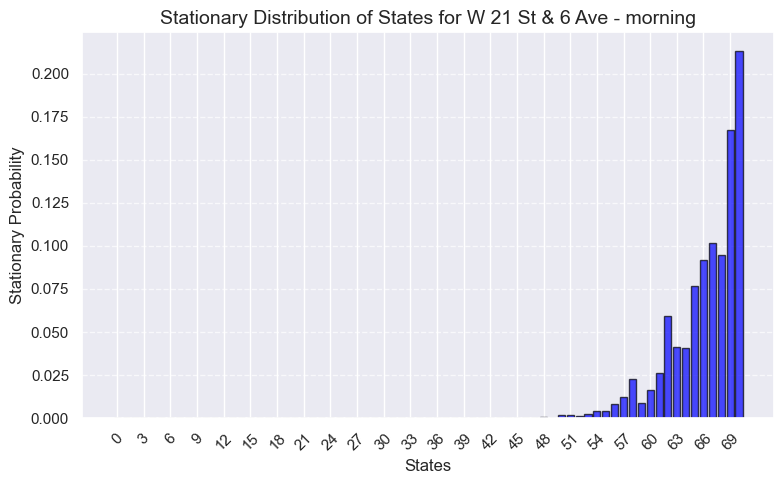

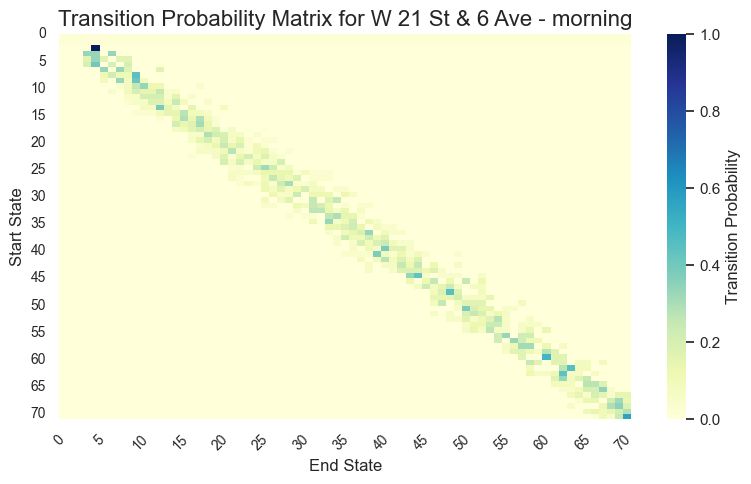

In [36]:
# Plot the stationary distribution & transition matrix - morning
plot_stationary_distribution(pi, station, capacity, 'morning')
plot_transition_matrix(matrix, station, capacity, 'morning')

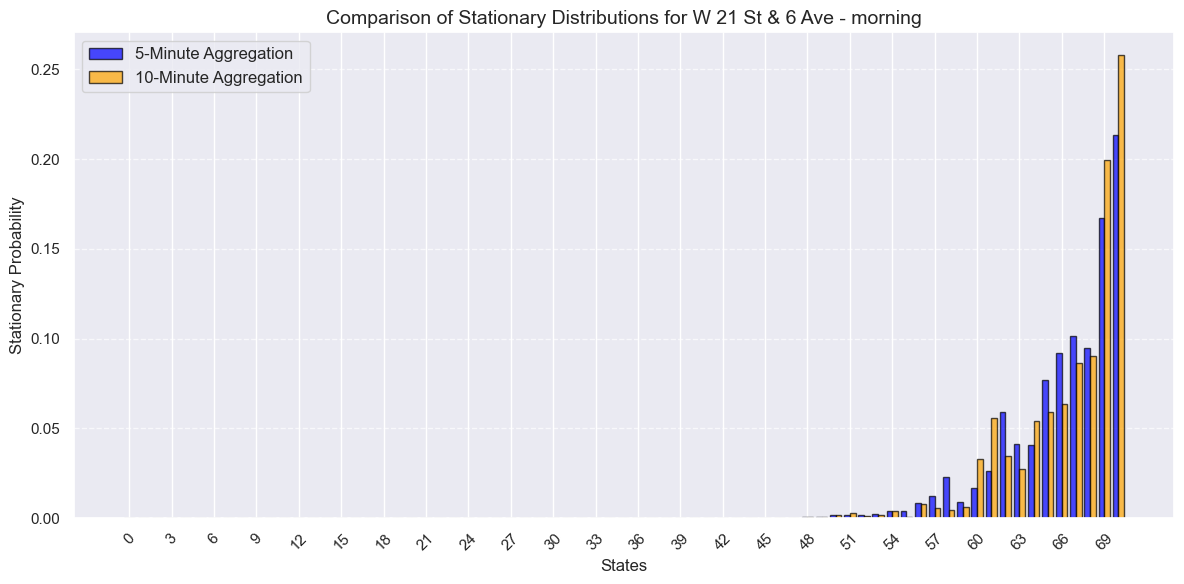

In [37]:
# Compare the 5 and 10-minute stationary distributions - morning
plot_comparison_stationary_distribution(pi, pi2, station, capacity, 'morning')

In [38]:
# Get transition matrix and stationary distribution - evening
matrix, pi = get_stationary(df_evening, capacity)

All rows sum to 1.
Min value: 0.0, at index: 70
Max value: 0.124, at index: 0


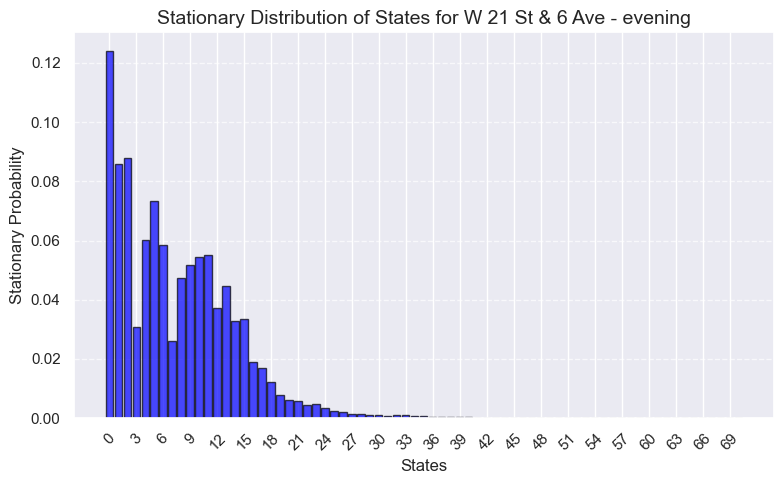

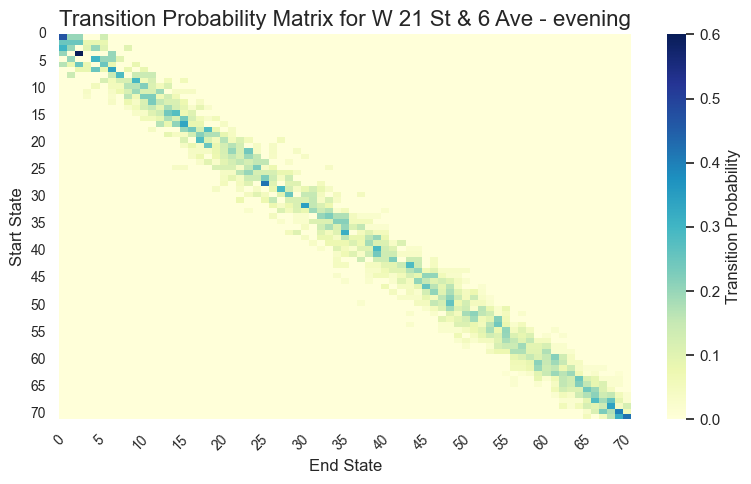

In [39]:
# Plot the stationary distribution & transition matrix - evening
plot_stationary_distribution(pi, station, capacity, 'evening')
plot_transition_matrix(matrix, station, capacity, 'evening')

In [40]:
matrix2, pi2 = get_stationary(df_evening2, capacity)

All rows sum to 1.
Min value: 0.0, at index: 70
Max value: 0.185, at index: 0


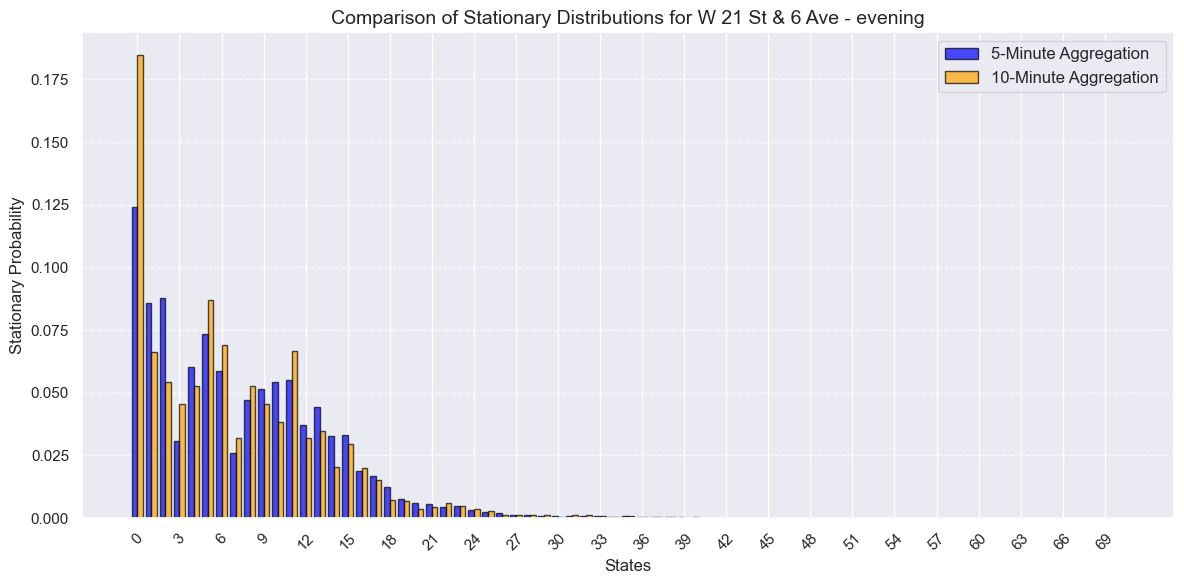

In [41]:
# Compare the 5 and 10-minute stationary distributions - evening
plot_comparison_stationary_distribution(pi, pi2, station, capacity, 'evening')

# E 40th St & Park Ave

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

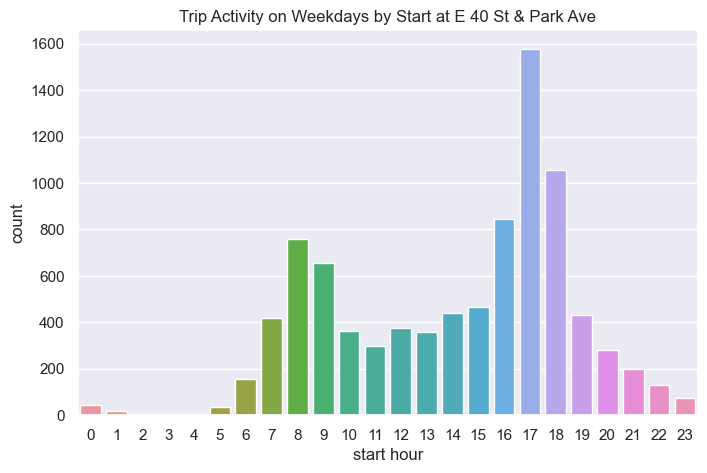

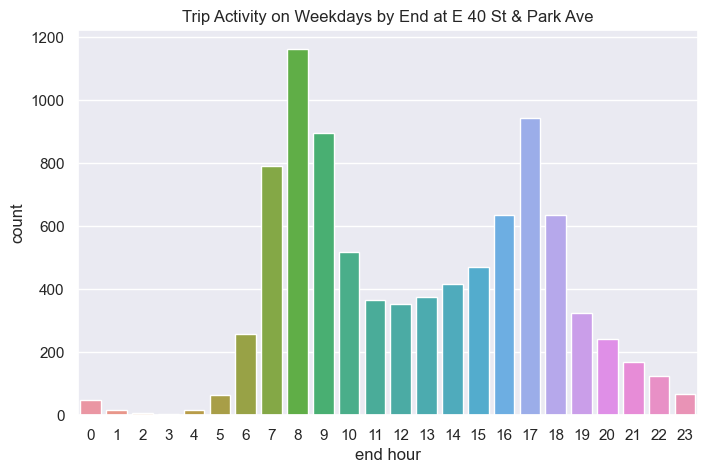

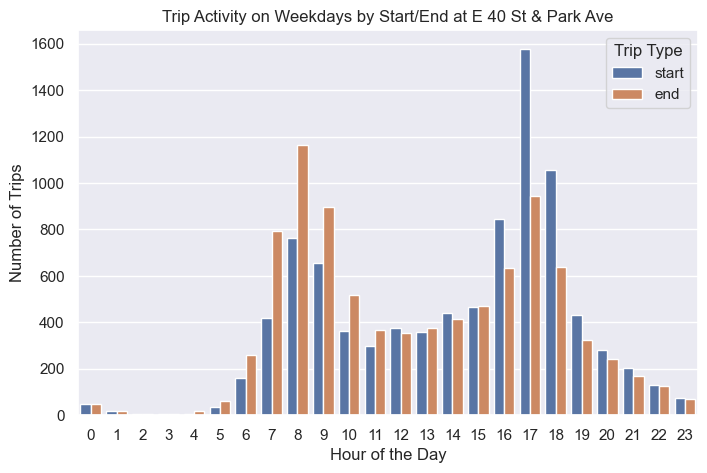

/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1702798834.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_trips = df_combined.groupby('hour').size().reset_index(name='total_trips')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', 

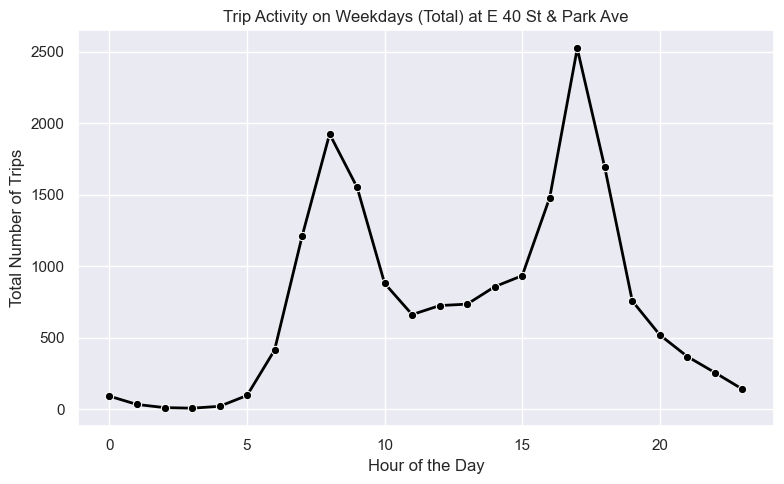

In [43]:
station = 'E 40 St & Park Ave'
# Google maps: 114
capacity = 114
station_plots(station)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


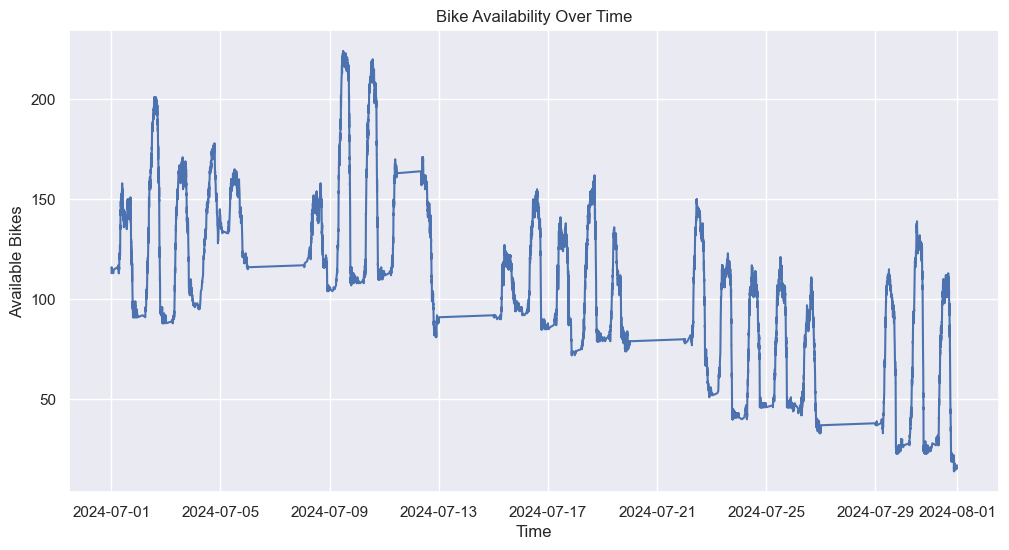

Maximum number of available bikes:  224


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('5T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


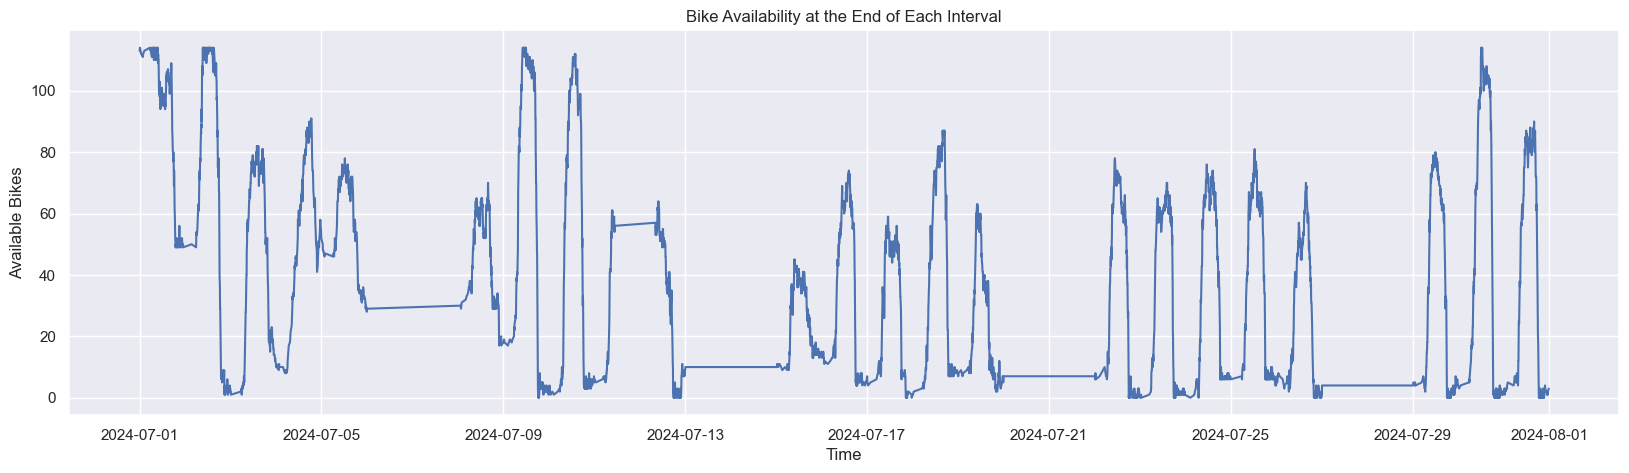

States with no outgoing transitions: [  1 106]
All rows sum to 1.
Min value: 0.0, at index: 1
Max value: 0.534, at index: 114


In [44]:
# Analyze pattern for 5-minute aggregation
df_morning, df_evening = analyze_pattern(station, capacity, 5, 1.0)
matrix, pi = get_stationary(df_morning, capacity)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


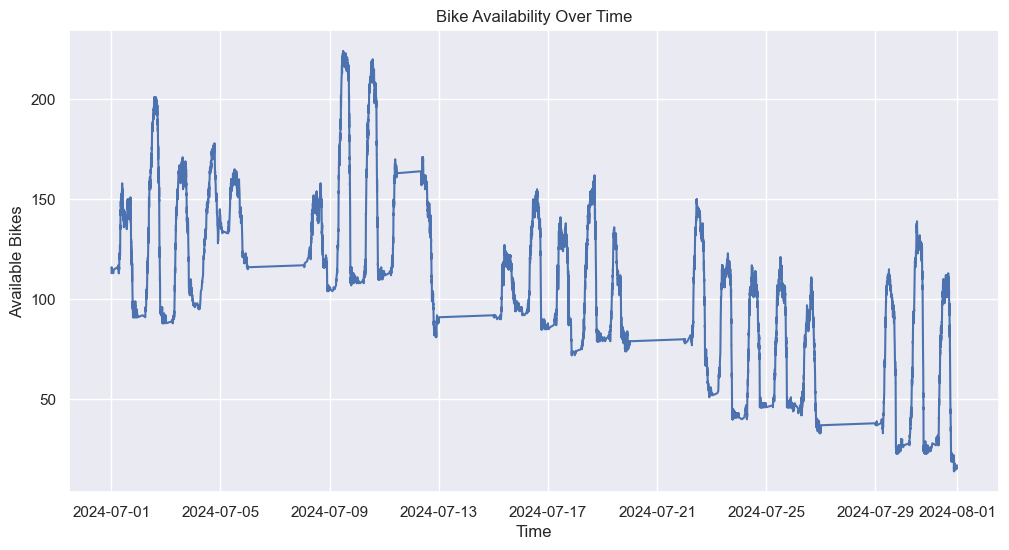

Maximum number of available bikes:  224


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:48: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('10T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


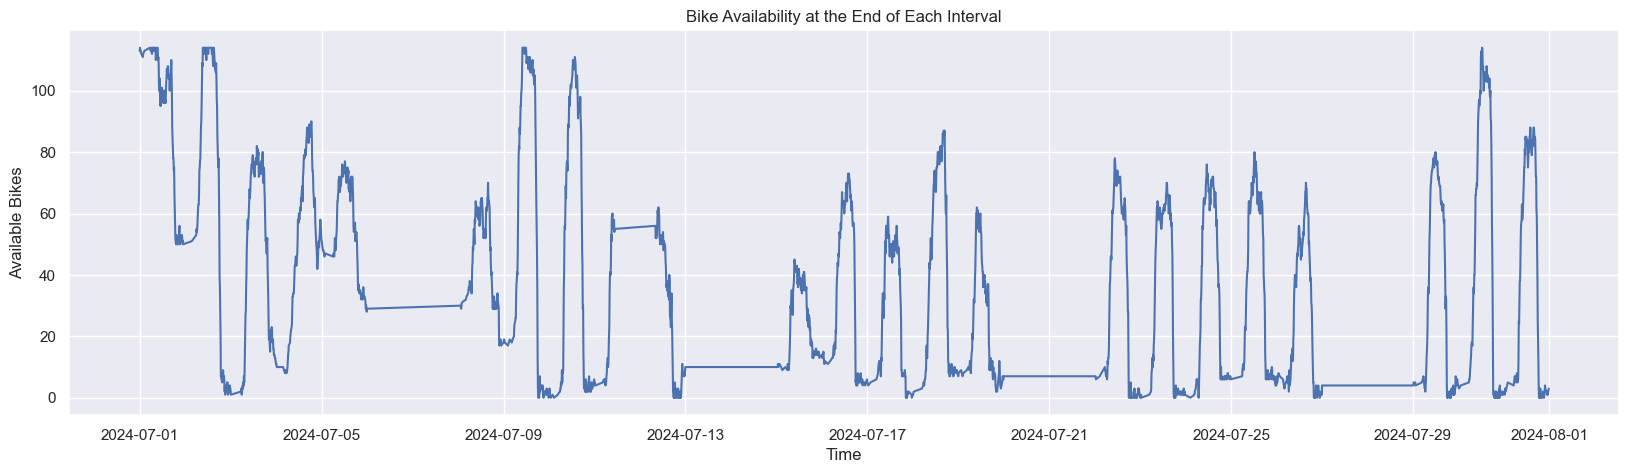

In [45]:
# Analyze pattern for 10-minute aggregation
df_morning2, df_evening2 = analyze_pattern(station, capacity, 10, 1.0)

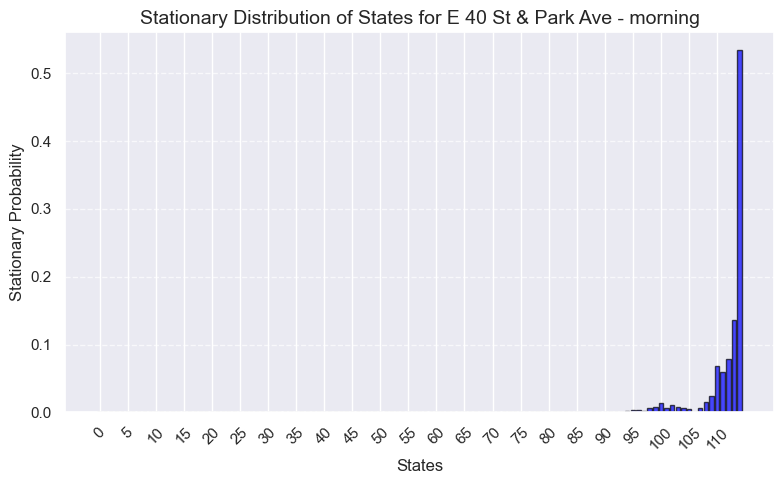

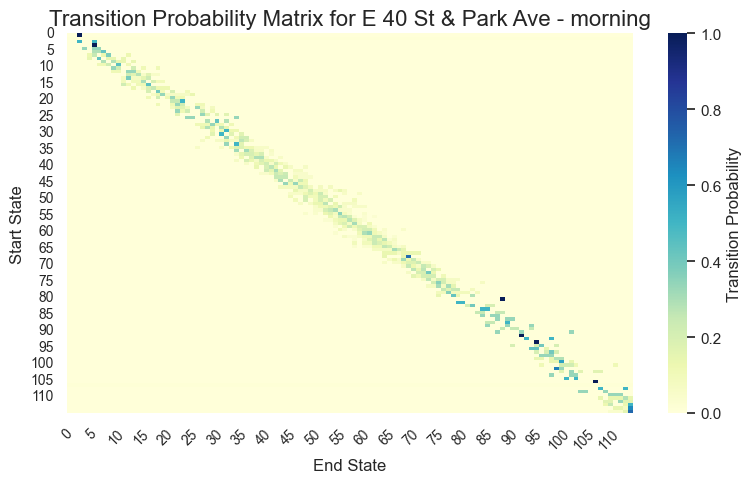

In [46]:
# Plot the stationary distribution & transition matrix - morning
plot_stationary_distribution(pi, station, capacity, 'morning')
plot_transition_matrix(matrix, station, capacity, 'morning')

In [47]:
matrix2, pi2 = get_stationary(df_morning2, capacity)

States with no outgoing transitions: [  1   3  80  83  92  94 105 106 107]
All rows sum to 1.
Min value: 0.0, at index: 0
Max value: 0.66, at index: 114


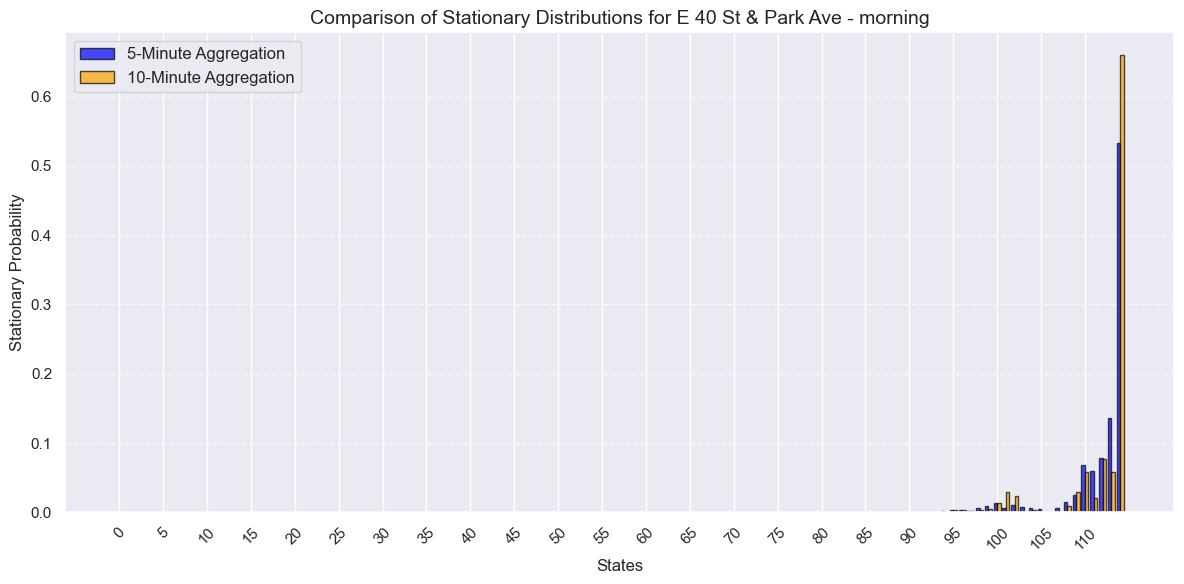

In [48]:
# Compare the 5 and 10-minute stationary distributions - morning
plot_comparison_stationary_distribution(pi, pi2, station, capacity, 'morning')

In [49]:
# Get transition matrix and stationary distribution - evening
matrix, pi = get_stationary(df_evening, capacity)

All rows sum to 1.
Min value: 0.0, at index: 16
Max value: 0.273, at index: 0


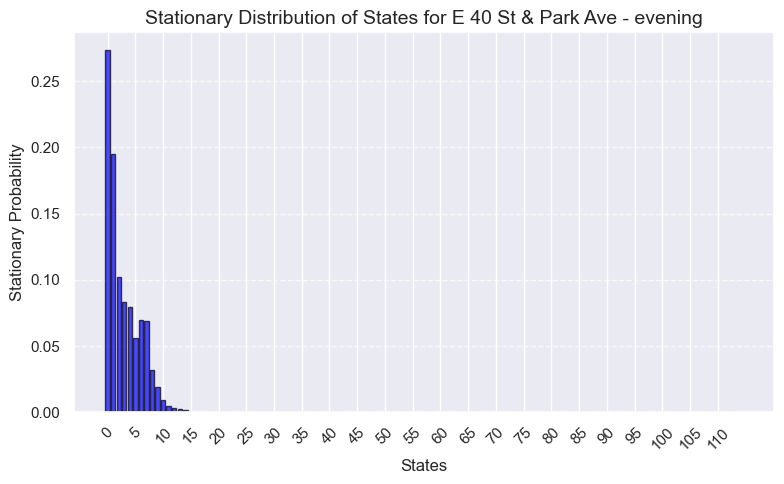

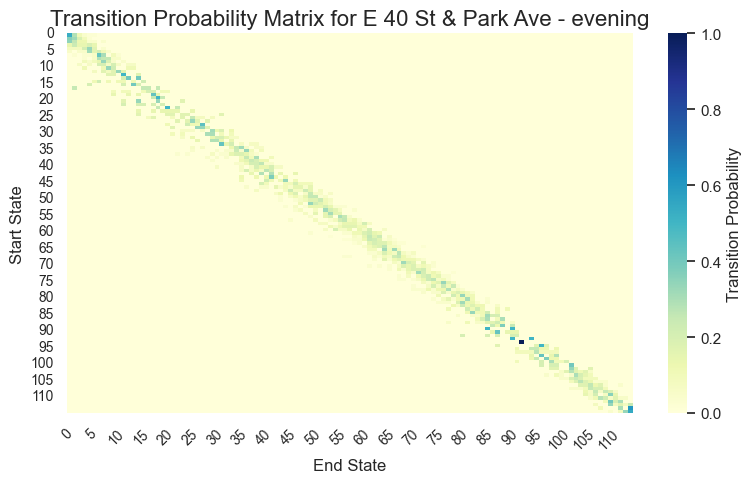

In [50]:
# Plot the stationary distribution & transition matrix - evening
plot_stationary_distribution(pi, station, capacity, 'evening')
plot_transition_matrix(matrix, station, capacity, 'evening')

In [51]:
matrix2, pi2 = get_stationary(df_evening2, capacity)

States with no outgoing transitions: [24]
All rows sum to 1.
Min value: 0.0, at index: 16
Max value: 0.362, at index: 0


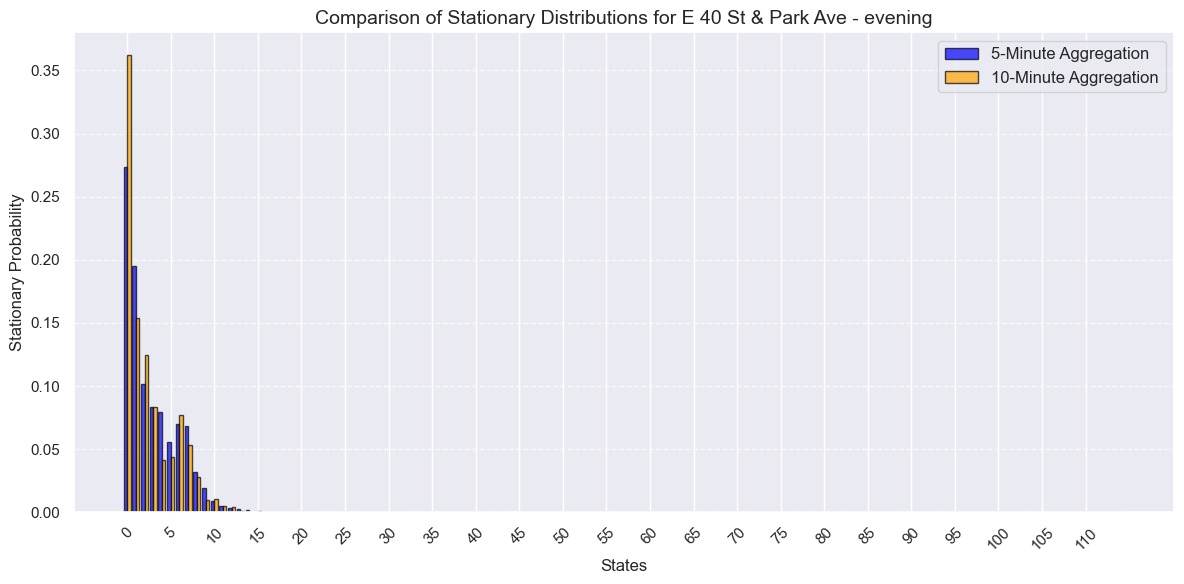

In [52]:
# Compare the 5 and 10-minute stationary distributions - evening
plot_comparison_stationary_distribution(pi, pi2, station, capacity, 'evening')

# West St & Chambers St

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

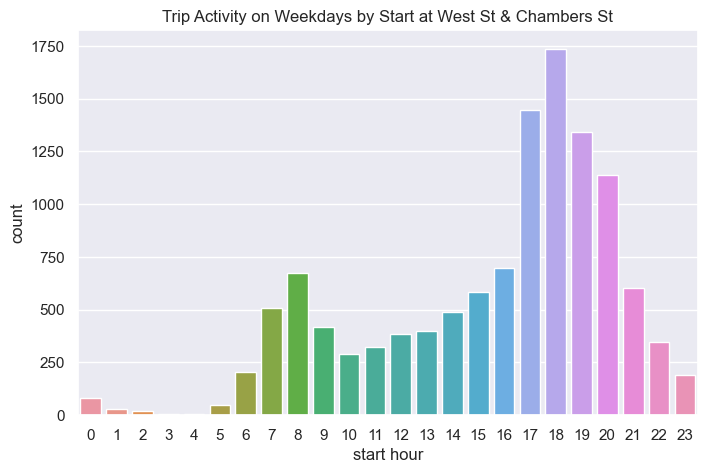

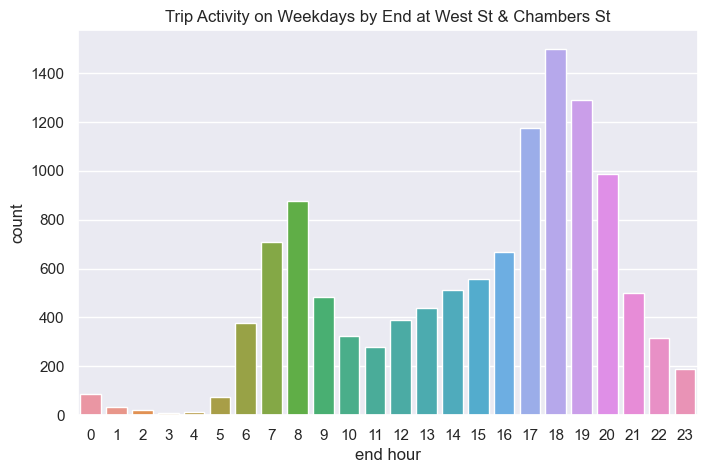

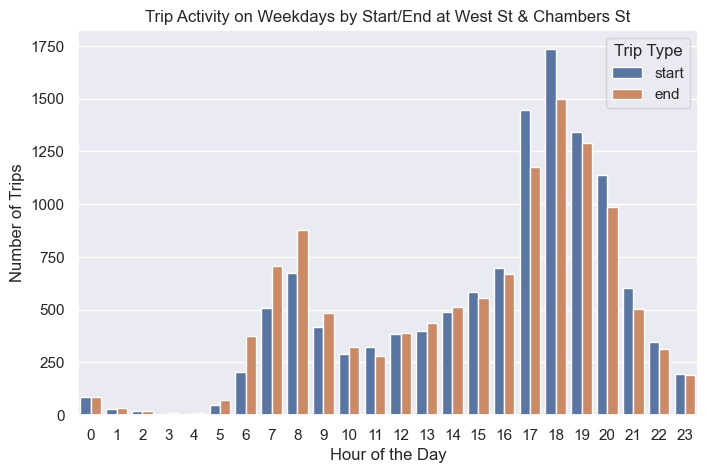

/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1702798834.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_trips = df_combined.groupby('hour').size().reset_index(name='total_trips')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', 

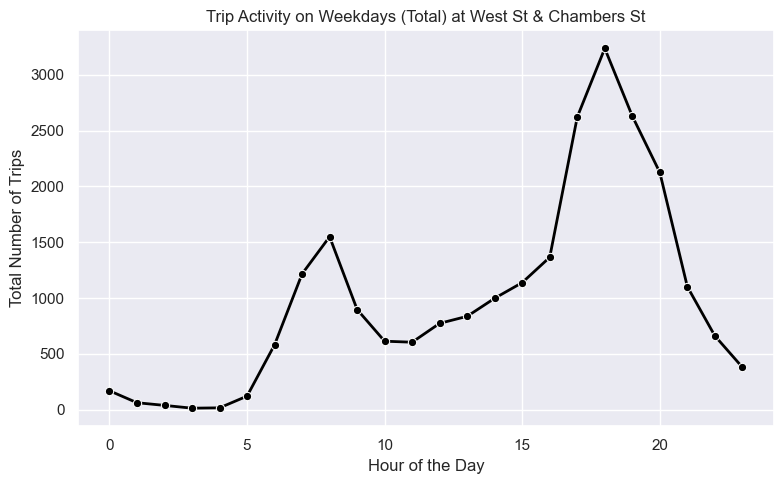

In [53]:
station = 'West St & Chambers St'
# Google maps: 112
capacity = 112
station_plots(station)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


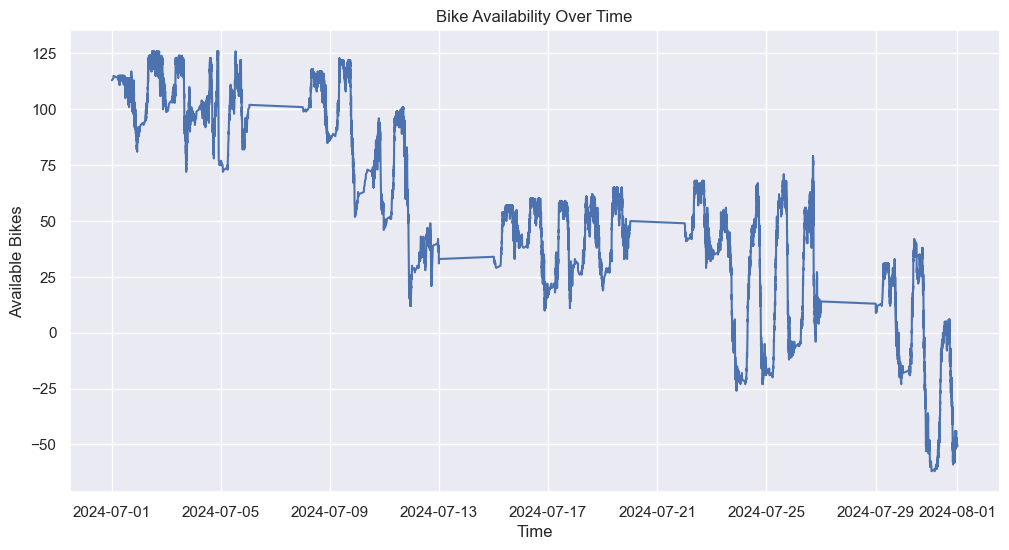

Maximum number of available bikes:  126


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('5T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


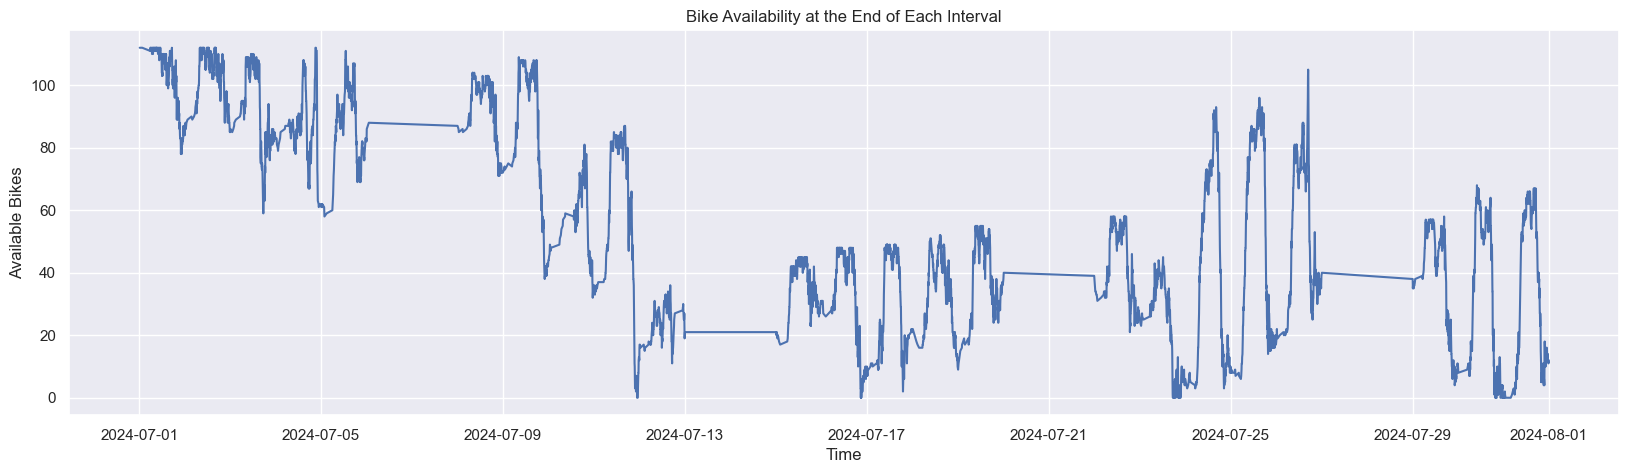

In [54]:
# Analyze pattern for 5-minute aggregation
df_morning, df_evening = analyze_pattern(station, capacity, 5, 1.0)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


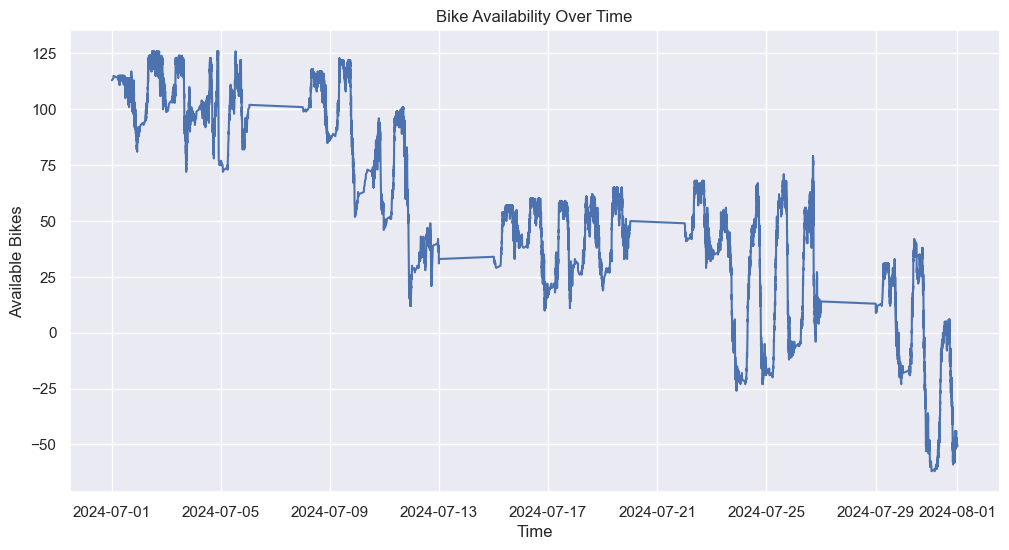

Maximum number of available bikes:  126


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:48: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('10T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


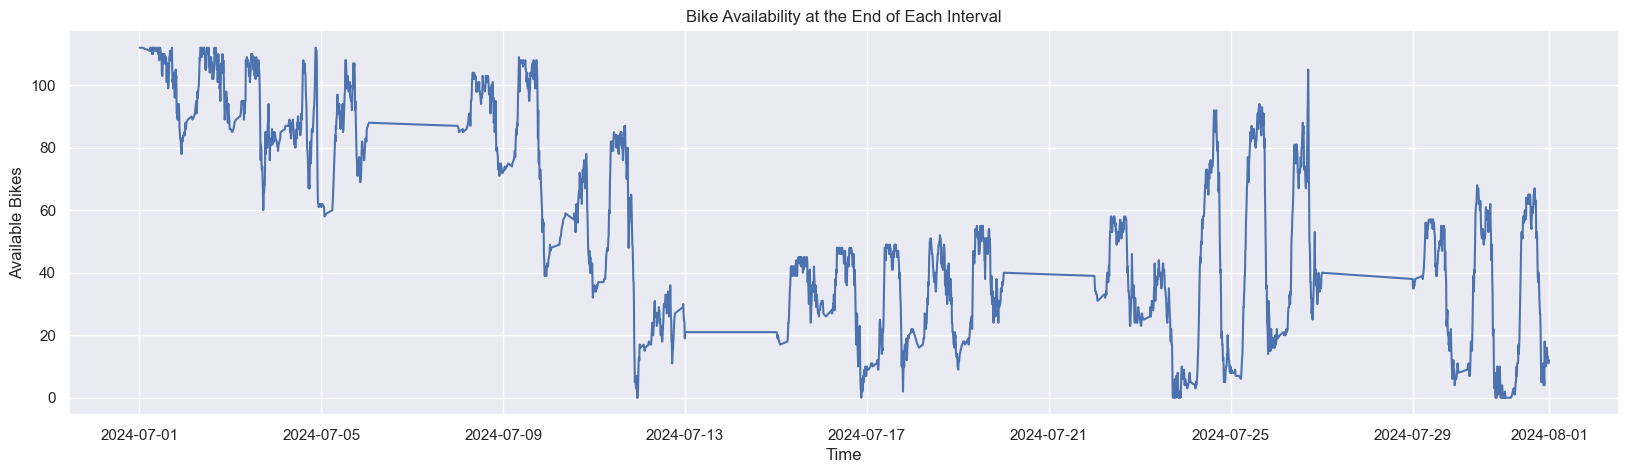

In [55]:
# Analyze pattern for 10-minute aggregation
df_morning2, df_evening2 = analyze_pattern(station, capacity, 10, 1.0)

In [56]:
# Get transition matrix and stationary distribution - morning
matrix, pi = get_stationary(df_morning, capacity)

States with no outgoing transitions: [ 0  1  2  3  4  5  8  9 13]
All rows sum to 1.
Min value: 0.0, at index: 0
Max value: 0.205, at index: 112


In [57]:
matrix2, pi2 = get_stationary(df_morning2, capacity)

States with no outgoing transitions: [ 0  1  2  3  4  5  6  8  9 13 74]
All rows sum to 1.
Min value: 0.0, at index: 1
Max value: 0.215, at index: 112


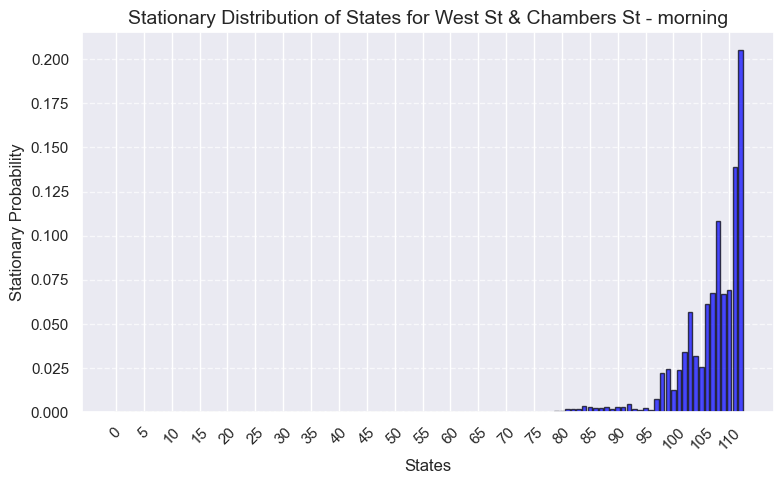

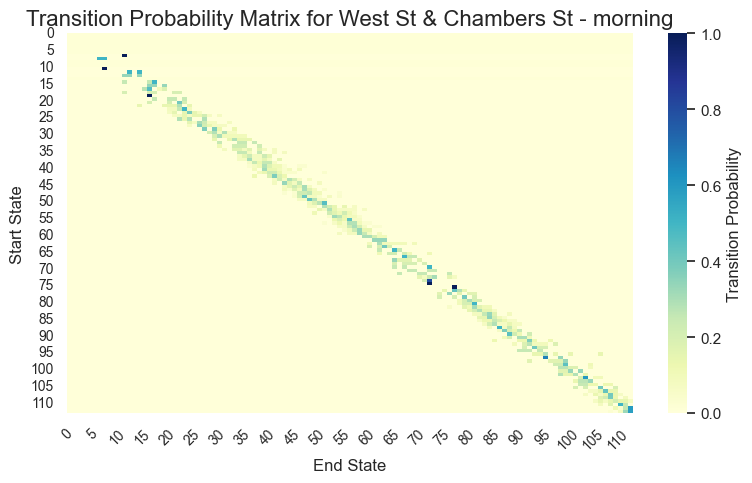

In [58]:
# Plot the stationary distribution & transition matrix - morning
plot_stationary_distribution(pi, station, capacity, 'morning')
plot_transition_matrix(matrix, station, capacity, 'morning')

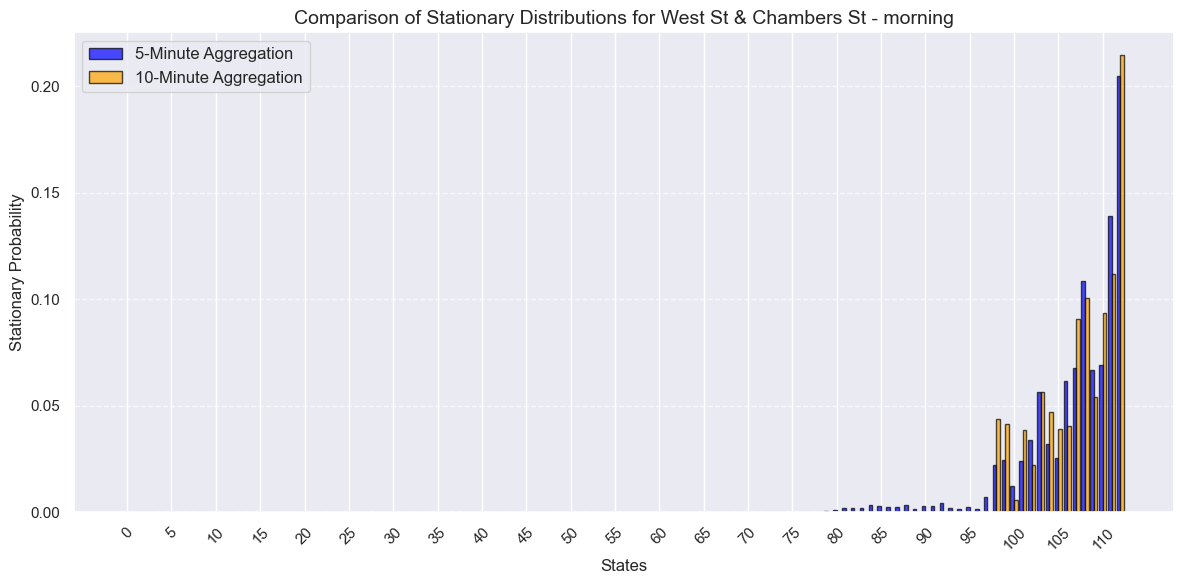

In [59]:
# Compare the 5 and 10-minute stationary distributions - morning
plot_comparison_stationary_distribution(pi, pi2, station, capacity, 'morning')

In [60]:
# Get transition matrix and stationary distribution - evening
matrix, pi = get_stationary(df_evening, capacity)

All rows sum to 1.
Min value: 0.0, at index: 111
Max value: 0.214, at index: 0


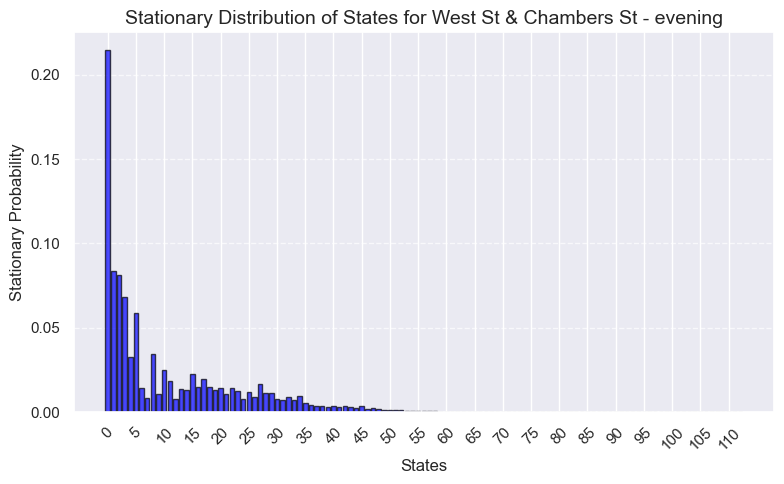

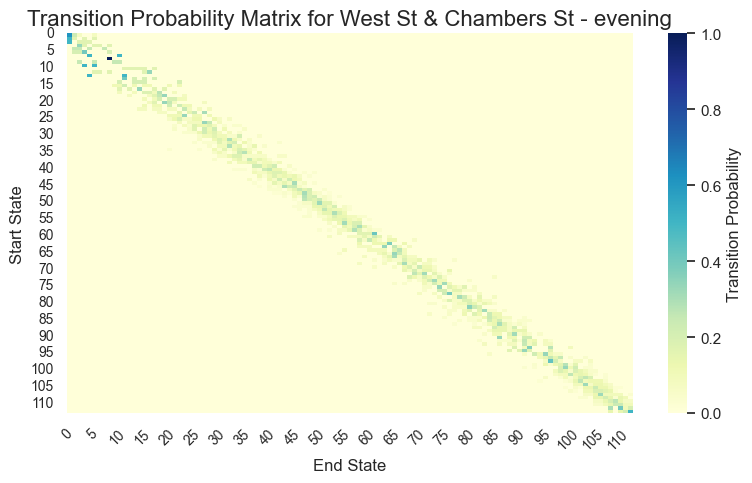

In [61]:
# Plot the stationary distribution & transition matrix - evening
plot_stationary_distribution(pi, station, capacity, 'evening')
plot_transition_matrix(matrix, station, capacity, 'evening')

In [62]:
matrix2, pi2 = get_stationary(df_evening2, capacity)

States with no outgoing transitions: [12]
All rows sum to 1.
Min value: 0.001, at index: 94
Max value: 0.19, at index: 0


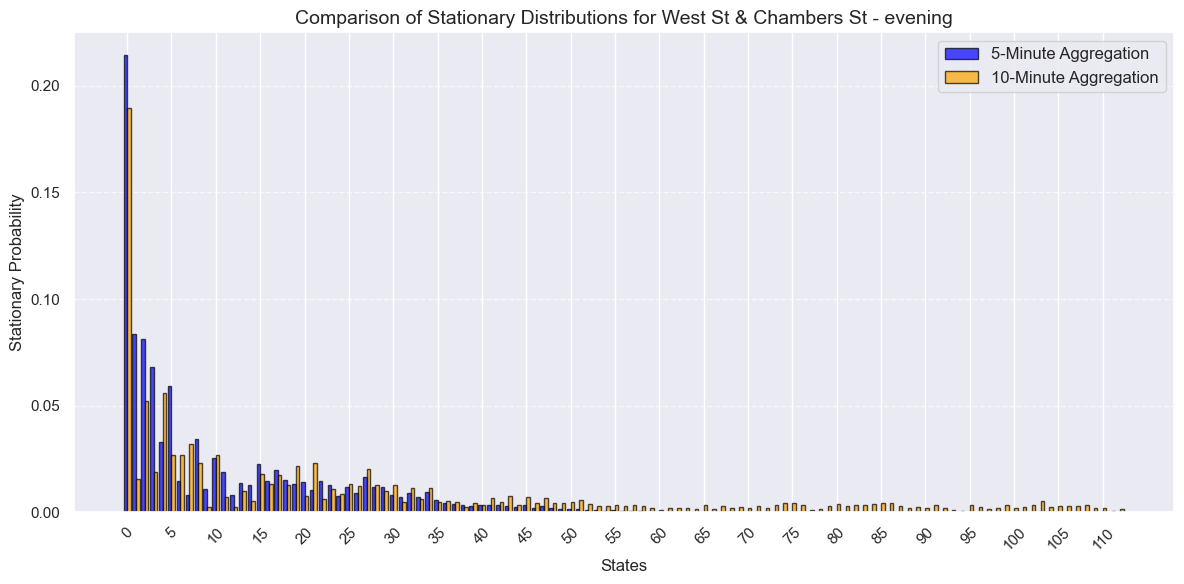

In [63]:
# Compare the 5 and 10-minute stationary distributions - evening
plot_comparison_stationary_distribution(pi, pi2, station, capacity, 'evening')

## Sensitivity Analysis for Capacity

In [64]:
def plot_capacity_comparison(pis, starting_percs, station, time_period):
    states = list(range(len(pis[0])))  # All distributions have the same number of states
    bar_width = 0.35
    group_spacing = 0.2
    x = [pos * (1 + group_spacing) for pos in range(len(states))]  # Add spacing between groups
    plt.figure(figsize=(18, 8))
    
    # Iterate over distributions and starting percentages
    for i, (pi, start_perc) in enumerate(zip(pis, starting_percs)):
        plt.bar(
            [pos + i * bar_width - (len(starting_percs) - 1) * bar_width / 2 for pos in x],
            pi,
            width=bar_width,
            alpha=0.7,
            edgecolor='black',
            label=f'Starting Bikes: {start_perc * 100:.0f}% ({int((len(states)-1)*start_perc)})'
        )
    
    plt.title(f"Comparison of Stationary Distributions for {station} - {time_period}", fontsize=14)
    plt.xlabel("States", fontsize=12)
    plt.ylabel("Stationary Probability", fontsize=12)
    plt.xticks(ticks=x[::max(1, len(states) // 20)], labels=states[::max(1, len(states) // 20)], rotation=45)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    margin = 1.0
    plt.xlim(x[0] - margin, x[-1] + margin)  # Extend x-axis for readability
    
    plt.tight_layout()
    plt.savefig(f'stationary_capacity_{station}_{time_period}.png')
    plt.show()

def gen_stat_plot(station, capacity, starting_percentages):
    pis_morning = []
    pis_evening = []
    
    for perc in starting_percentages:
        # Analyze pattern with the given starting percentage
        df_morning, df_evening = analyze_pattern(station, capacity, 5, perc)
        
        # Compute stationary distribution for morning
        _, pi_morning = get_stationary(df_morning, capacity)
        pis_morning.append(pi_morning)
        
        # Compute stationary distribution for evening
        _, pi_evening = get_stationary(df_evening, capacity)
        pis_evening.append(pi_evening)
    
    # Plot comparisons for morning & evening
    plot_capacity_comparison(pis_morning, starting_percentages, station, 'morning')
    plot_capacity_comparison(pis_evening, starting_percentages, station, 'evening')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


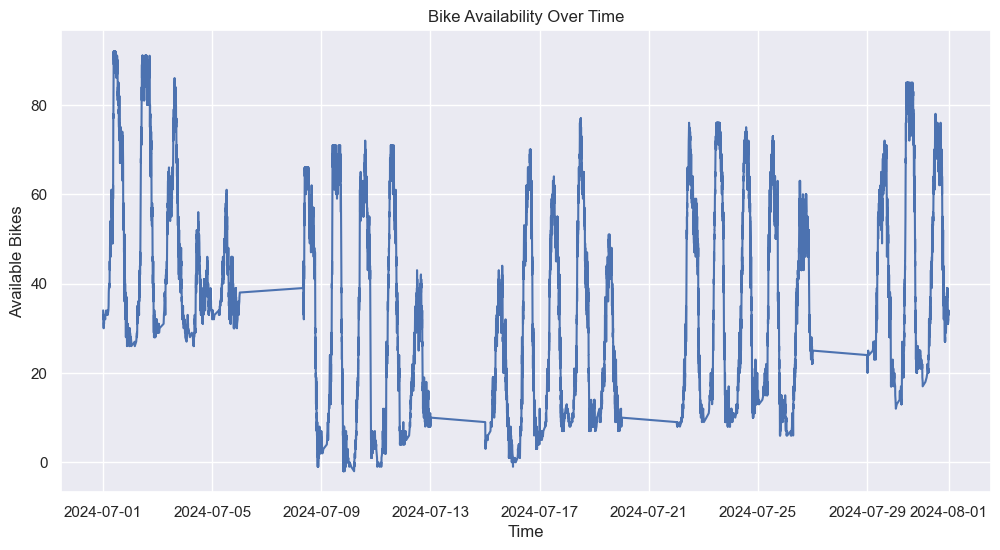

Maximum number of available bikes:  92


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('5T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


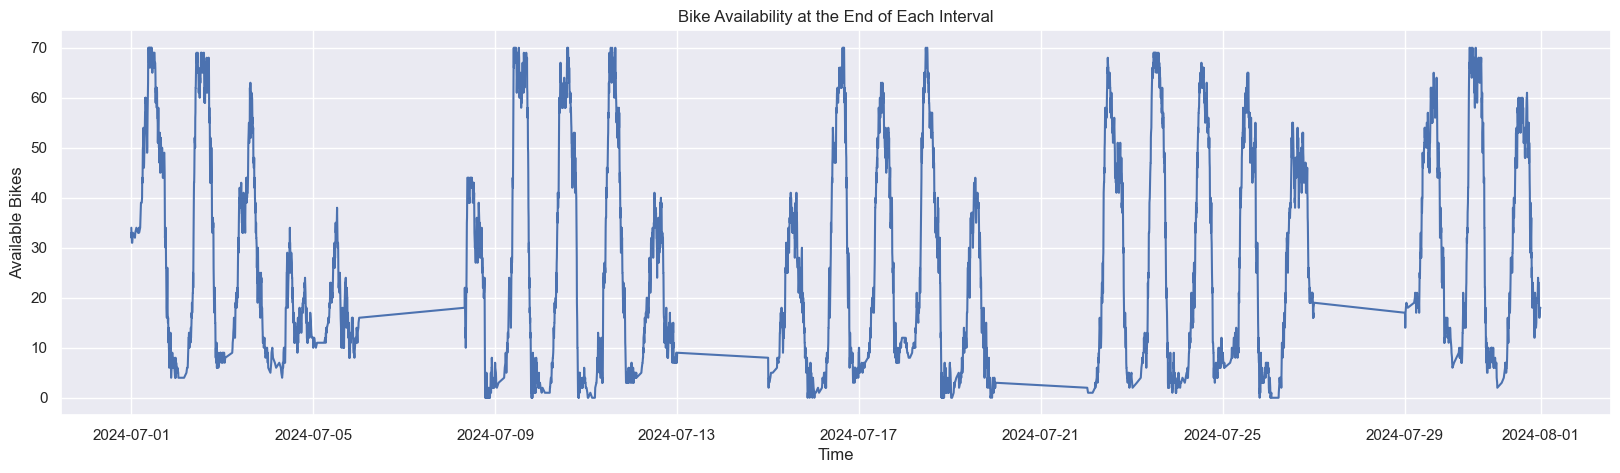

States with no outgoing transitions: [0 1]
All rows sum to 1.
Min value: 0.0, at index: 0
Max value: 0.201, at index: 70
All rows sum to 1.
Min value: 0.0, at index: 70
Max value: 0.124, at index: 0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


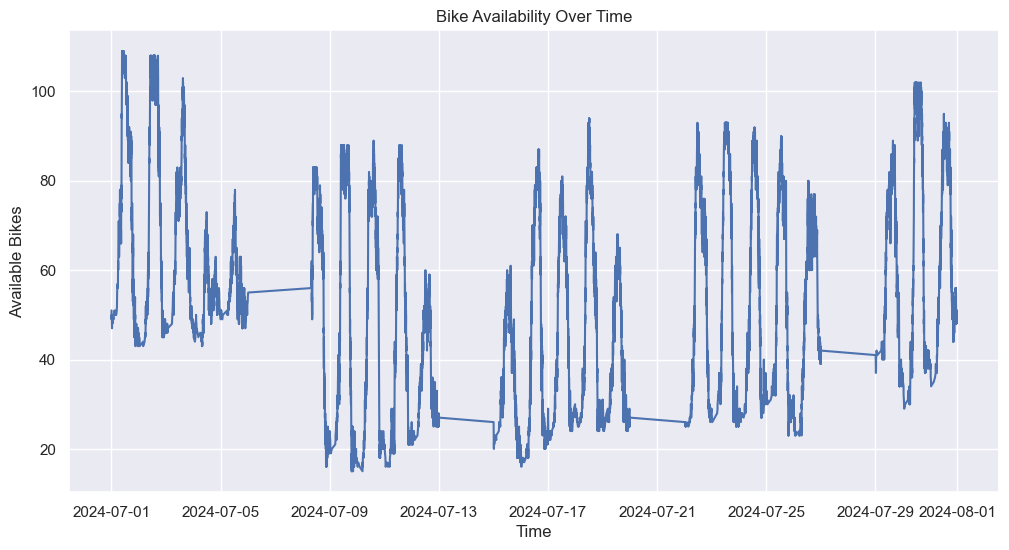

Maximum number of available bikes:  109


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('5T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


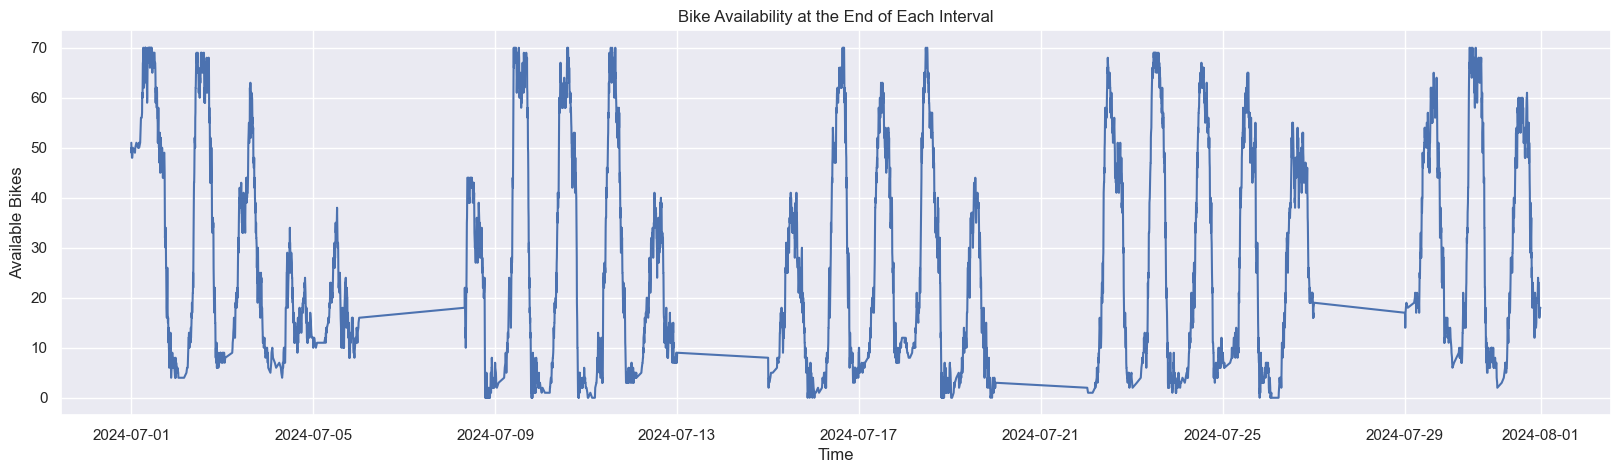

States with no outgoing transitions: [0 1]
All rows sum to 1.
Min value: 0.0, at index: 0
Max value: 0.213, at index: 70
All rows sum to 1.
Min value: 0.0, at index: 70
Max value: 0.124, at index: 0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


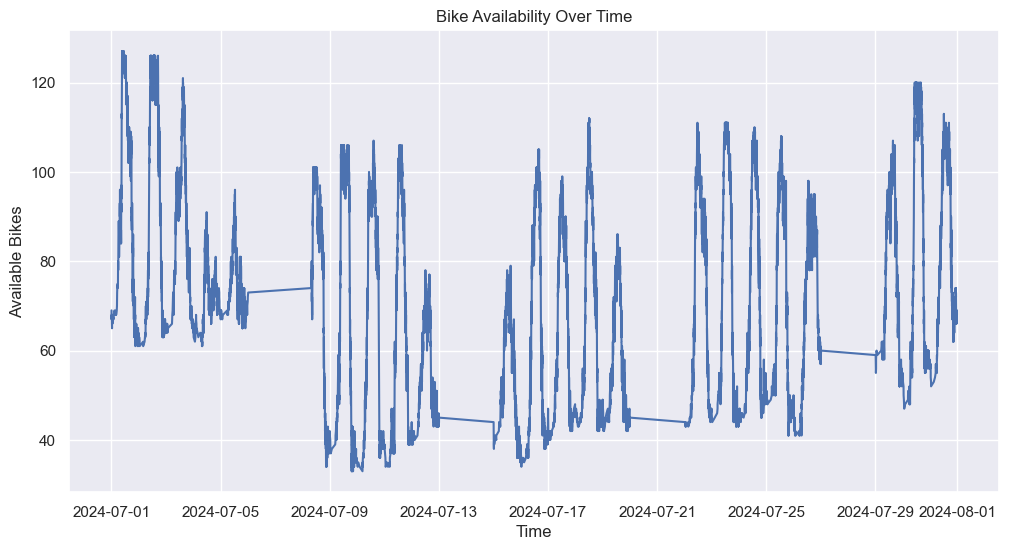

Maximum number of available bikes:  127


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('5T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


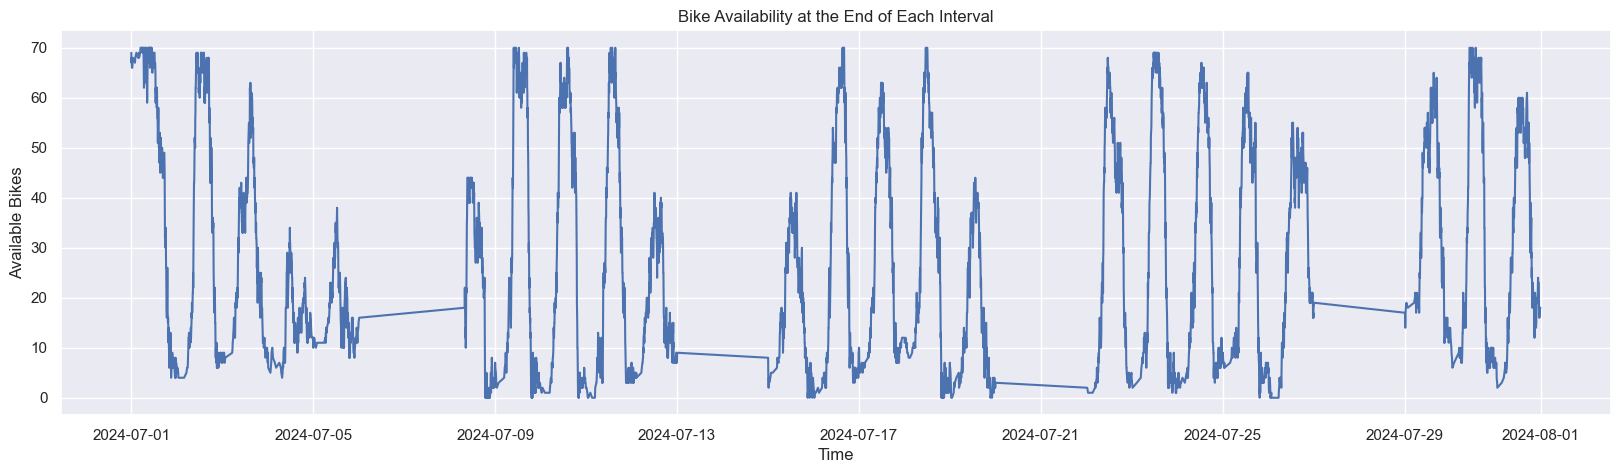

States with no outgoing transitions: [0 1]
All rows sum to 1.
Min value: 0.0, at index: 0
Max value: 0.213, at index: 70
All rows sum to 1.
Min value: 0.0, at index: 70
Max value: 0.124, at index: 0


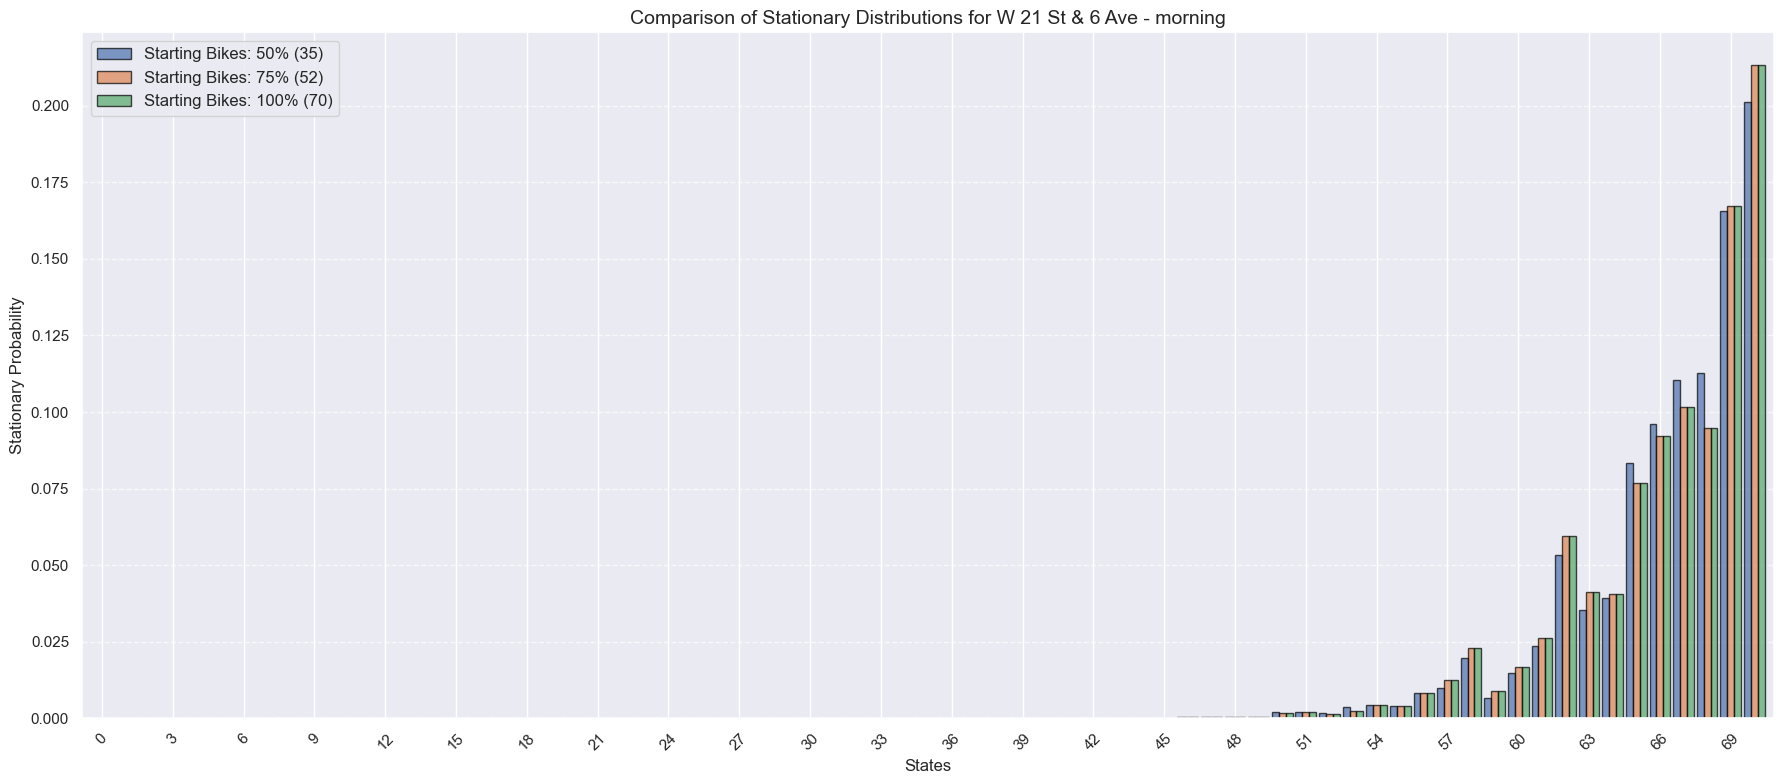

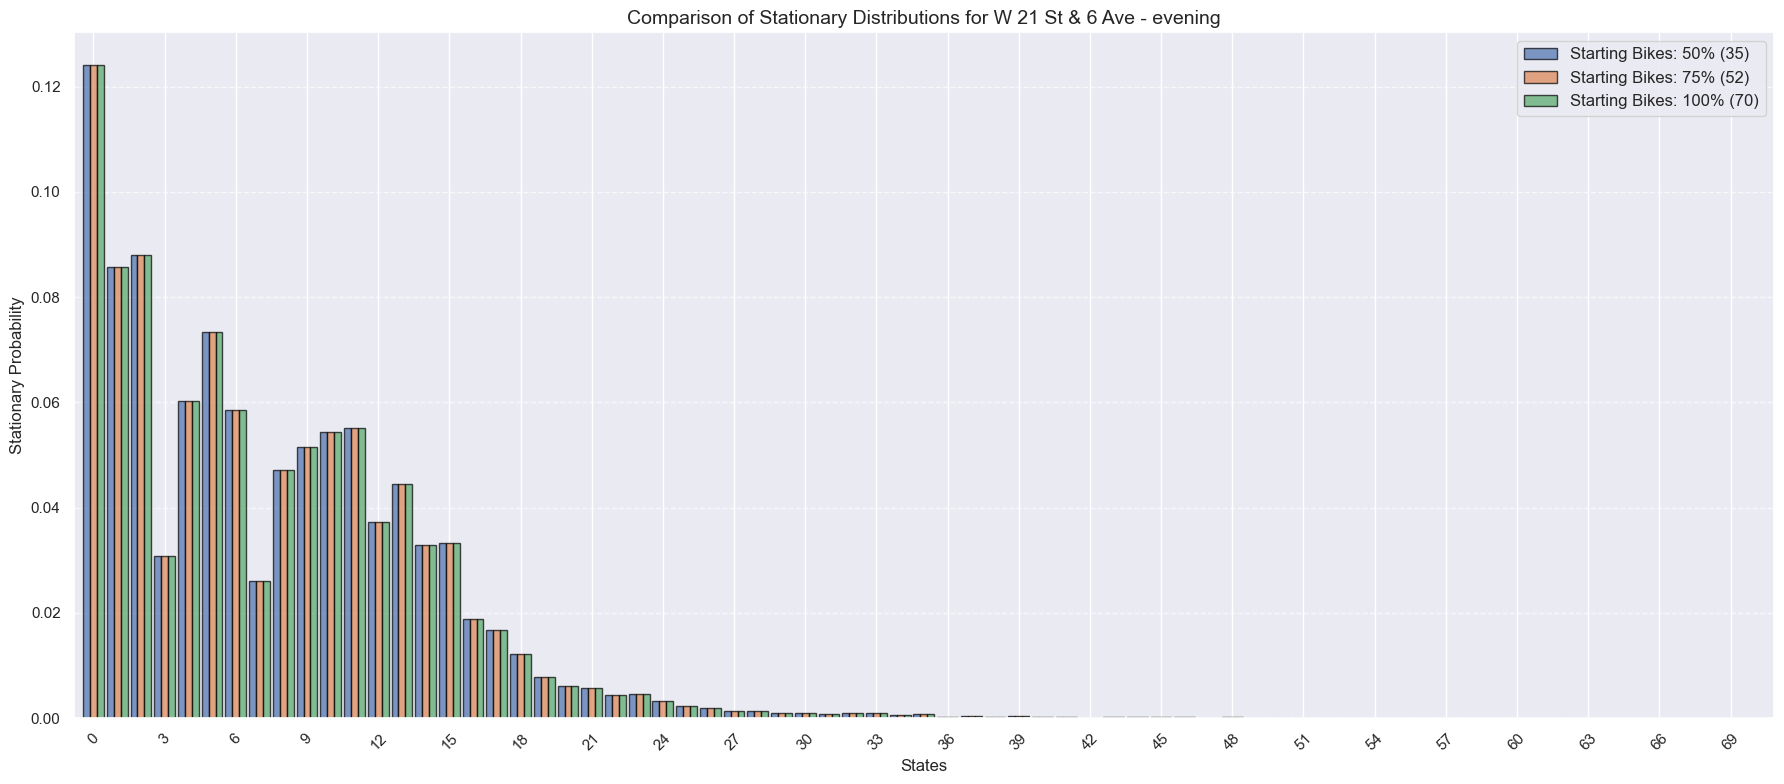

In [65]:
station = 'W 21 St & 6 Ave'
capacity = 70
starting_percentages = [0.5, 0.75, 1.0]  # Starting percentages to analyze

gen_stat_plot(station, capacity, starting_percentages)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


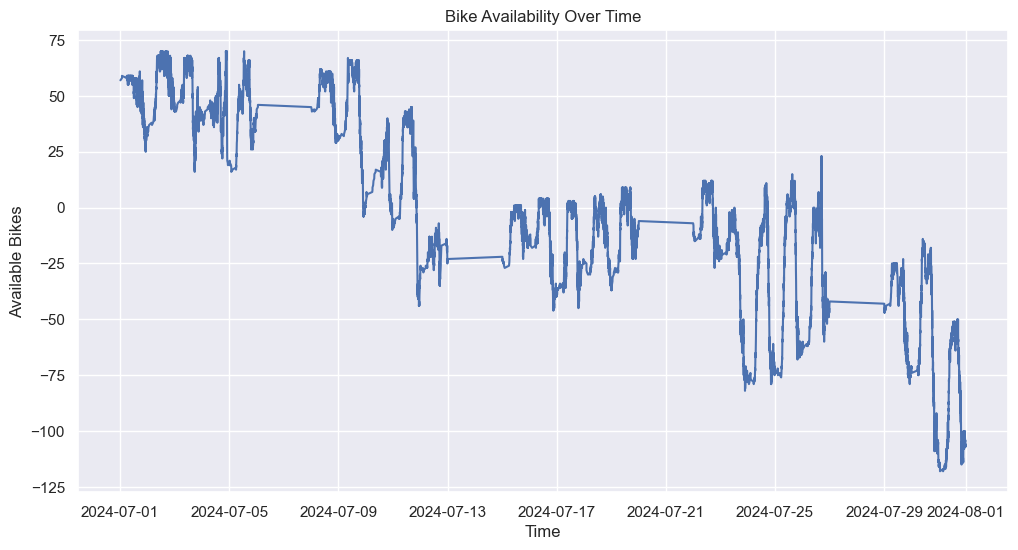

Maximum number of available bikes:  70


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('5T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


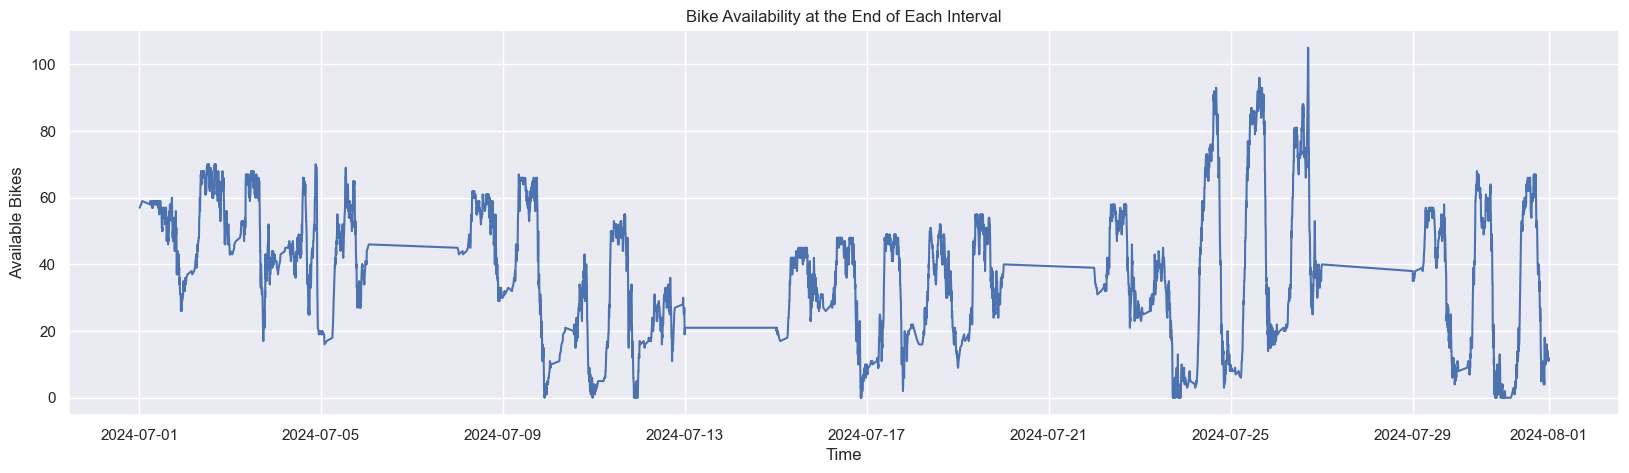

States with no outgoing transitions: [  0   1   2   3   4   5   8   9  13  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112]
All rows sum to 1.
Min value: 0.0, at index: 1
Max value: 0.344, at index: 84
States with no outgoing transitions: [ 97  98  99 100 101 104 106 107 108 109 110 111 112]
All rows sum to 1.
Min value: 0.0, at index: 97
Max value: 0.154, at index: 0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


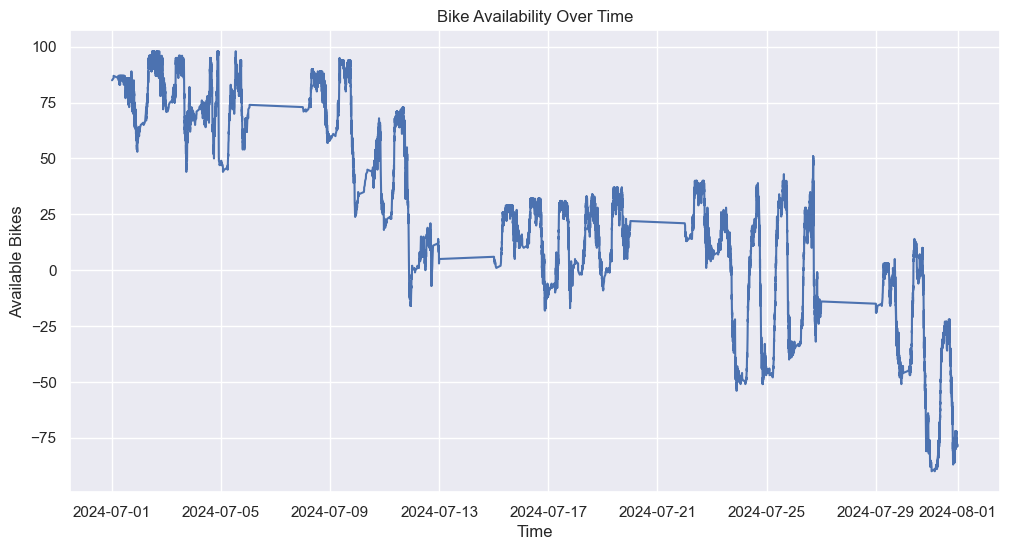

Maximum number of available bikes:  98


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('5T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


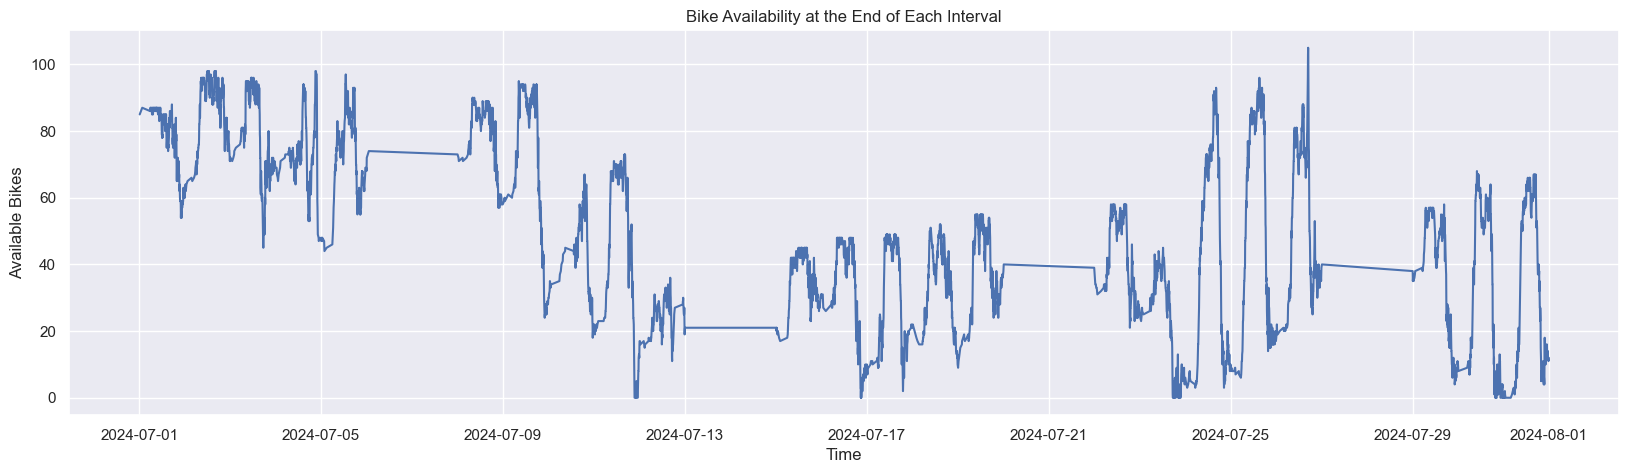

States with no outgoing transitions: [  0   1   2   3   4   5   8   9  13  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112]
All rows sum to 1.
Min value: 0.0, at index: 10
Max value: 0.071, at index: 87
States with no outgoing transitions: [ 99 100 101 104 106 107 108 109 110 111 112]
All rows sum to 1.
Min value: 0.0, at index: 112
Max value: 0.21, at index: 0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


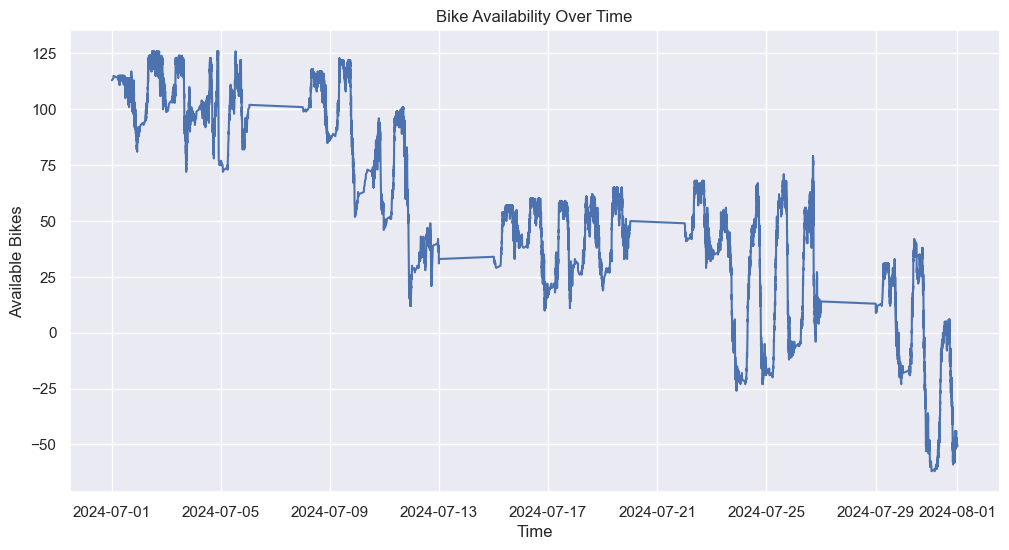

Maximum number of available bikes:  126


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('5T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


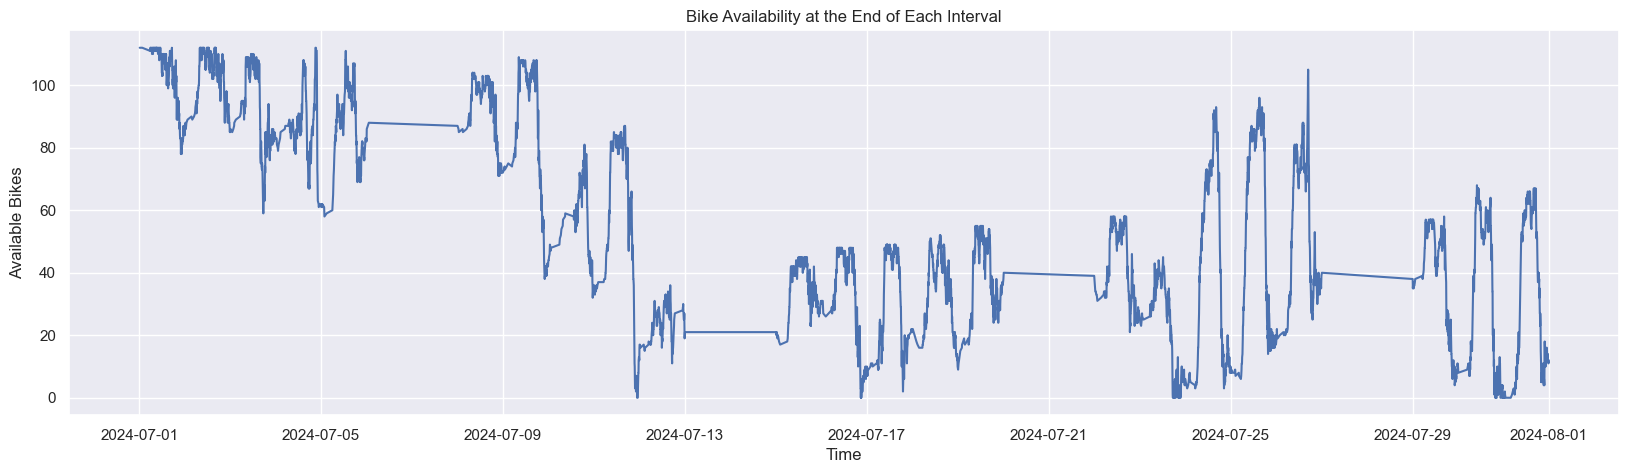

States with no outgoing transitions: [ 0  1  2  3  4  5  8  9 13]
All rows sum to 1.
Min value: 0.0, at index: 0
Max value: 0.205, at index: 112
All rows sum to 1.
Min value: 0.0, at index: 111
Max value: 0.214, at index: 0


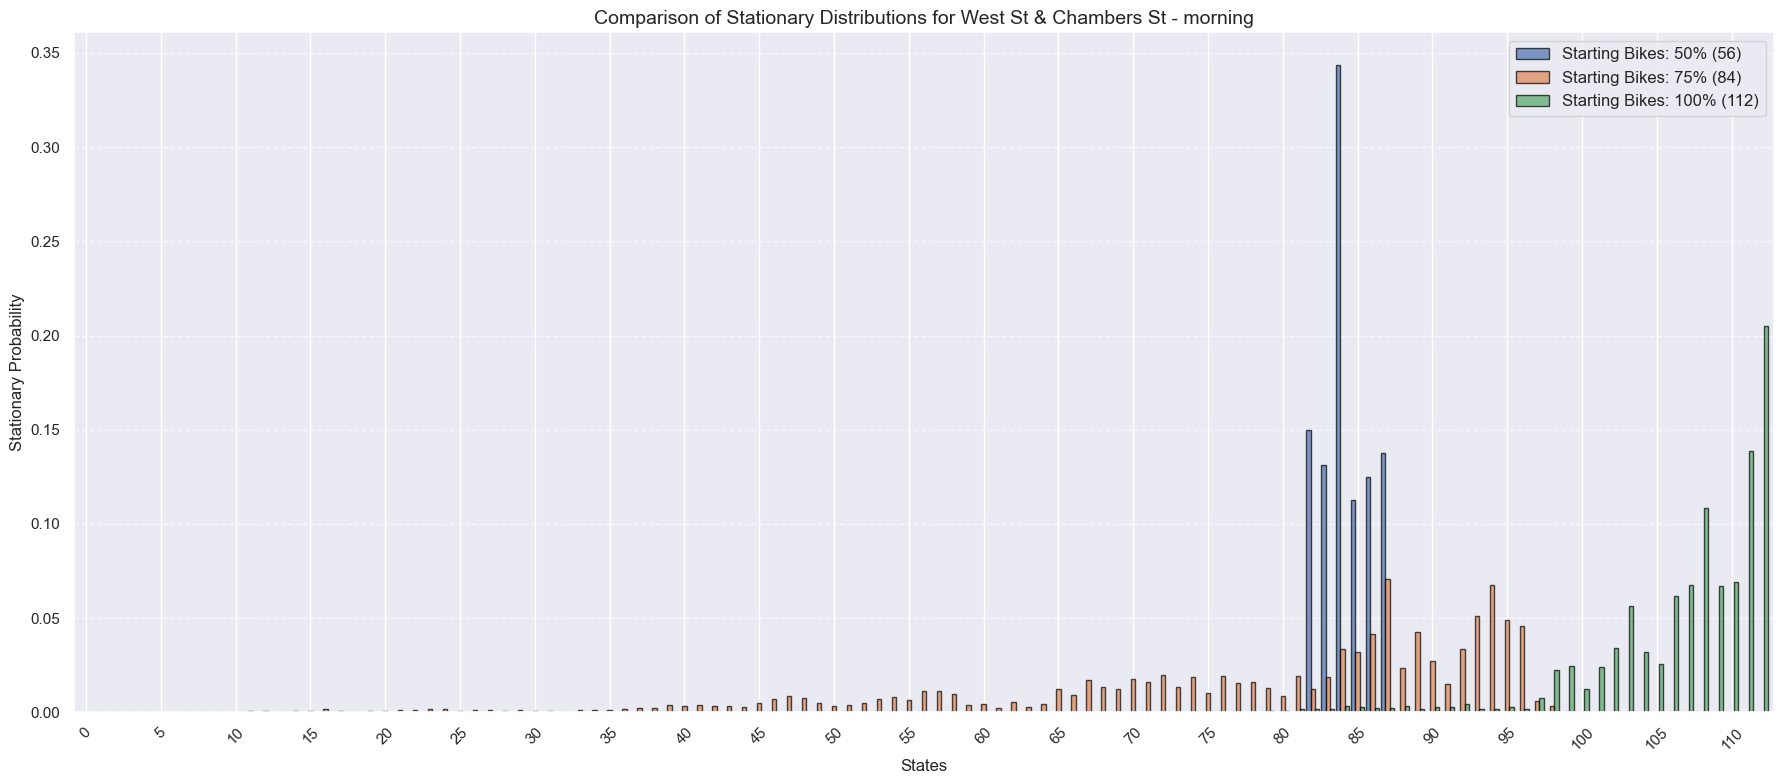

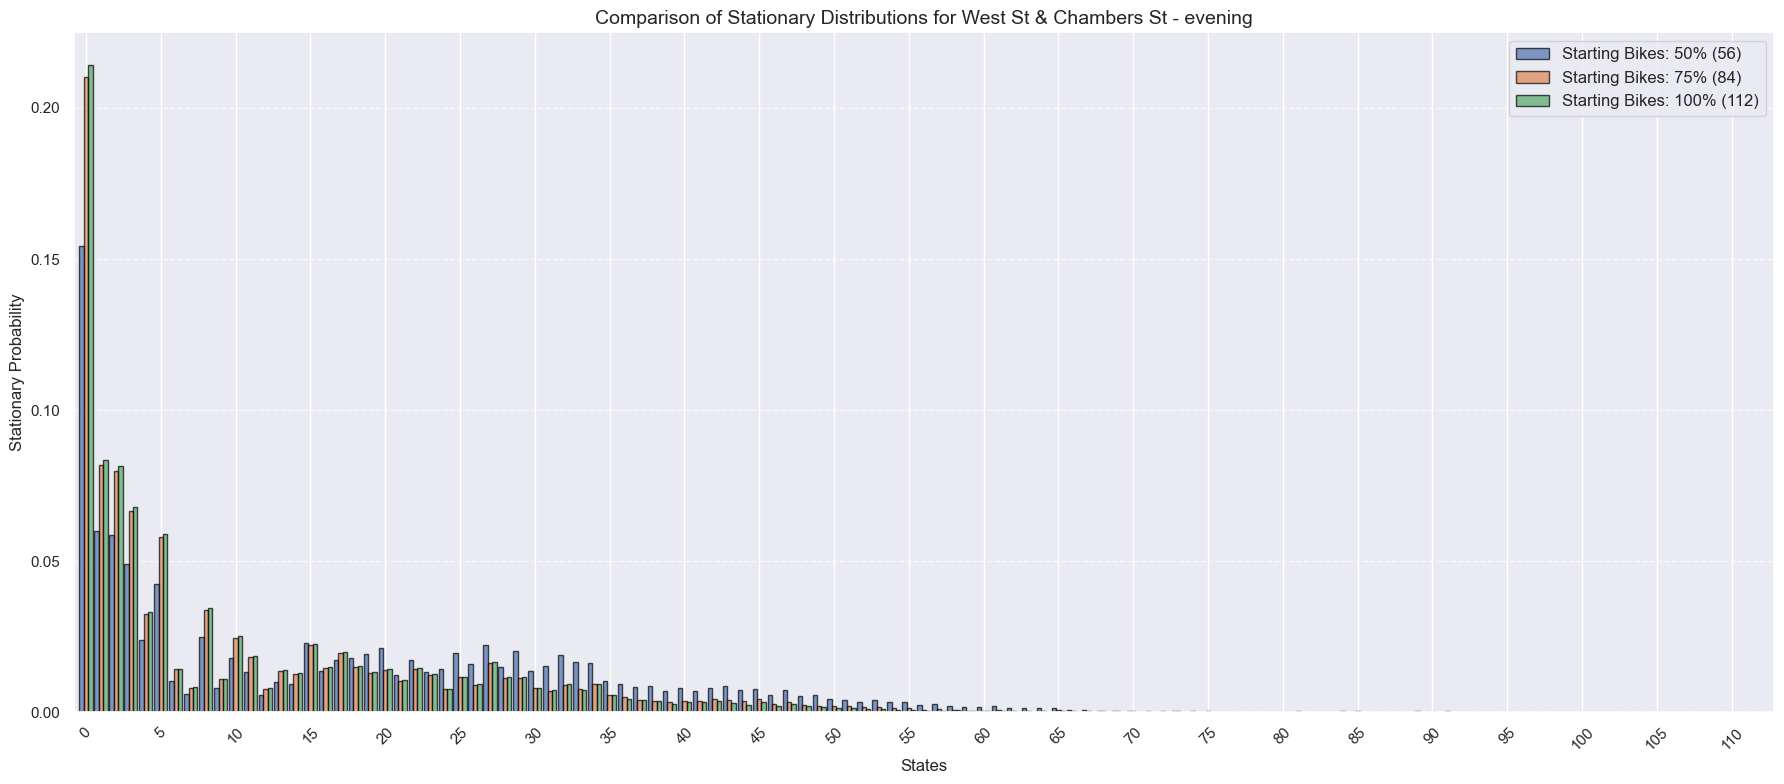

In [66]:
station = 'West St & Chambers St'
capacity = 112
starting_percentages = [0.5, 0.75, 1.0]  # Starting percentages to analyze

gen_stat_plot(station, capacity, starting_percentages)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


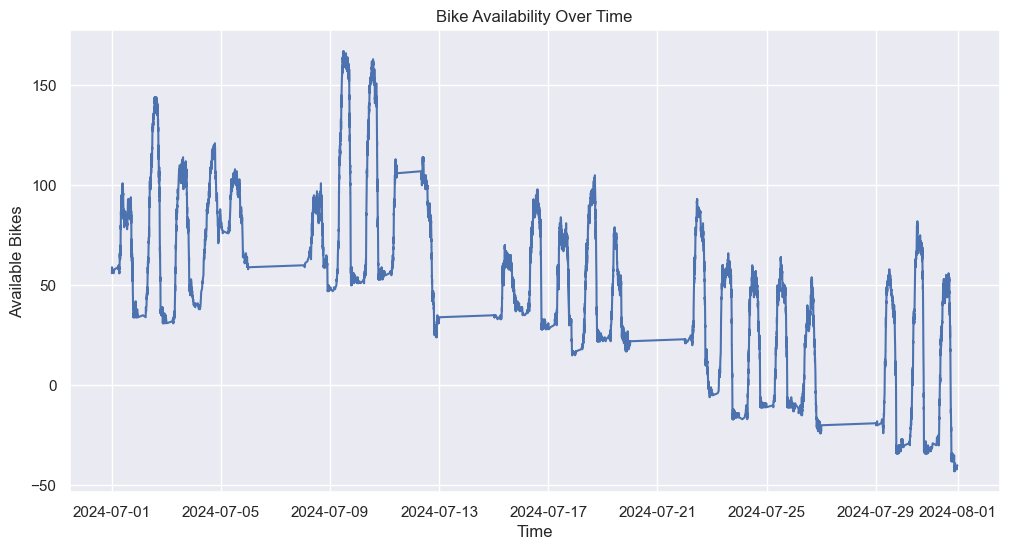

Maximum number of available bikes:  167


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('5T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


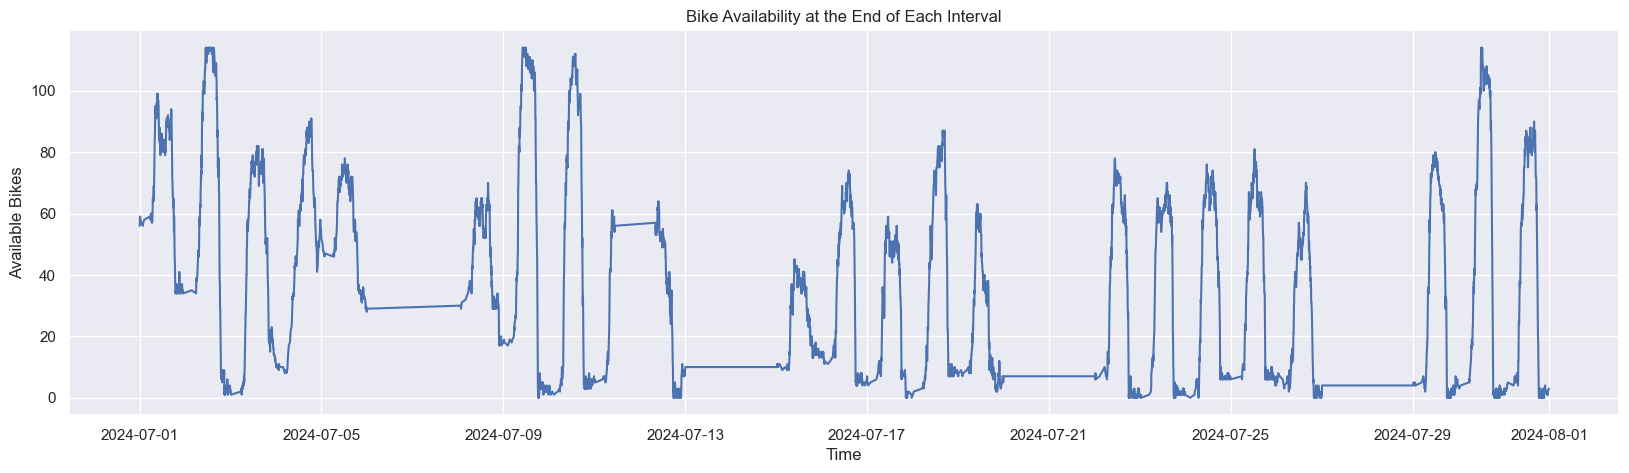

States with no outgoing transitions: [  1 105]
All rows sum to 1.
Min value: 0.0, at index: 105
Max value: 0.666, at index: 114
All rows sum to 1.
Min value: 0.0, at index: 16
Max value: 0.273, at index: 0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


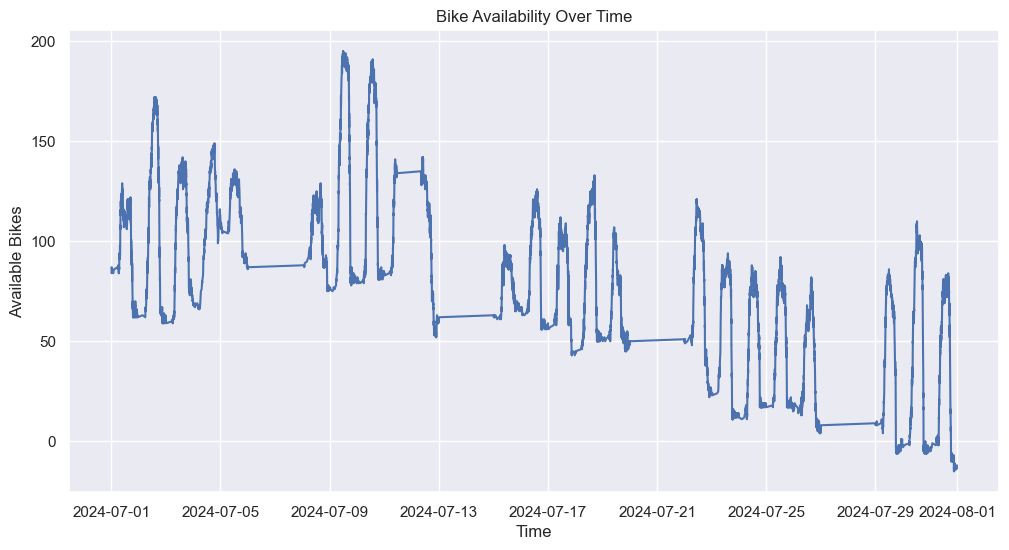

Maximum number of available bikes:  195


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('5T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


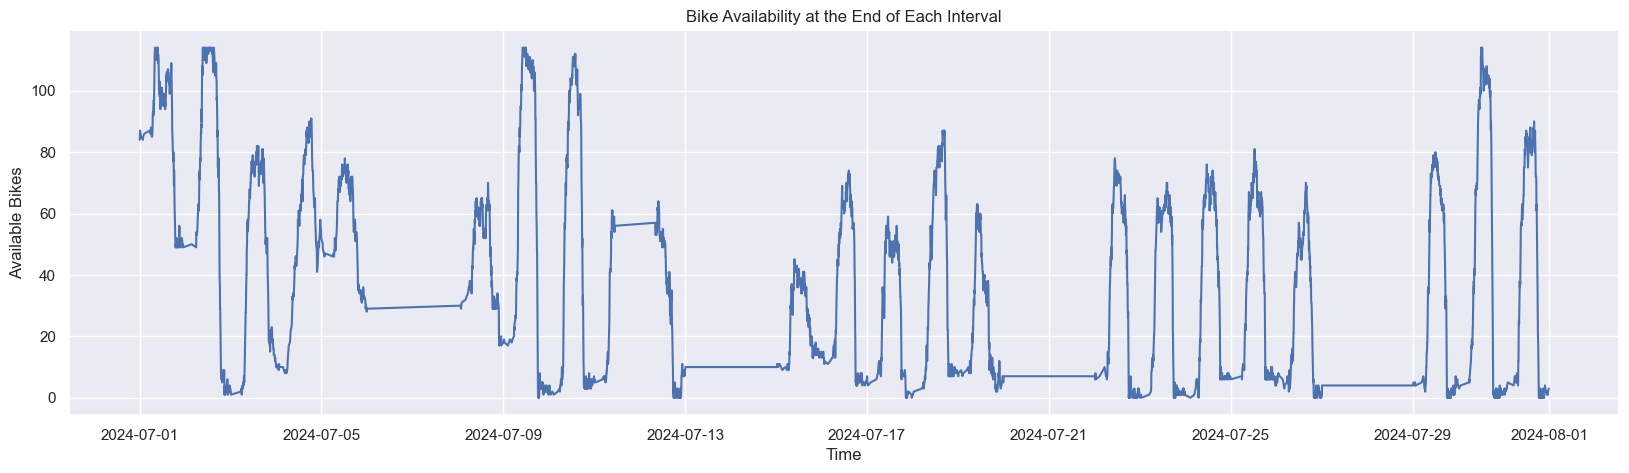

States with no outgoing transitions: [1]
All rows sum to 1.
Min value: 0.0, at index: 1
Max value: 0.503, at index: 114
All rows sum to 1.
Min value: 0.0, at index: 16
Max value: 0.273, at index: 0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


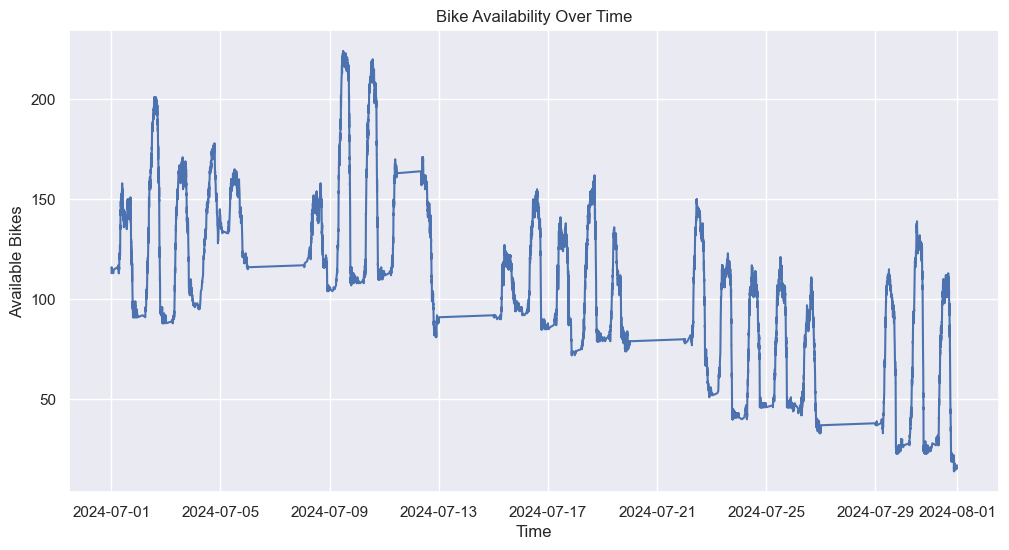

Maximum number of available bikes:  224


/var/folders/1q/28qc0vz13rl4r3s95p4cbv9r0000gn/T/ipykernel_7354/1087950245.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_both['time_bin'] = df_both['docktime'].dt.floor('5T')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


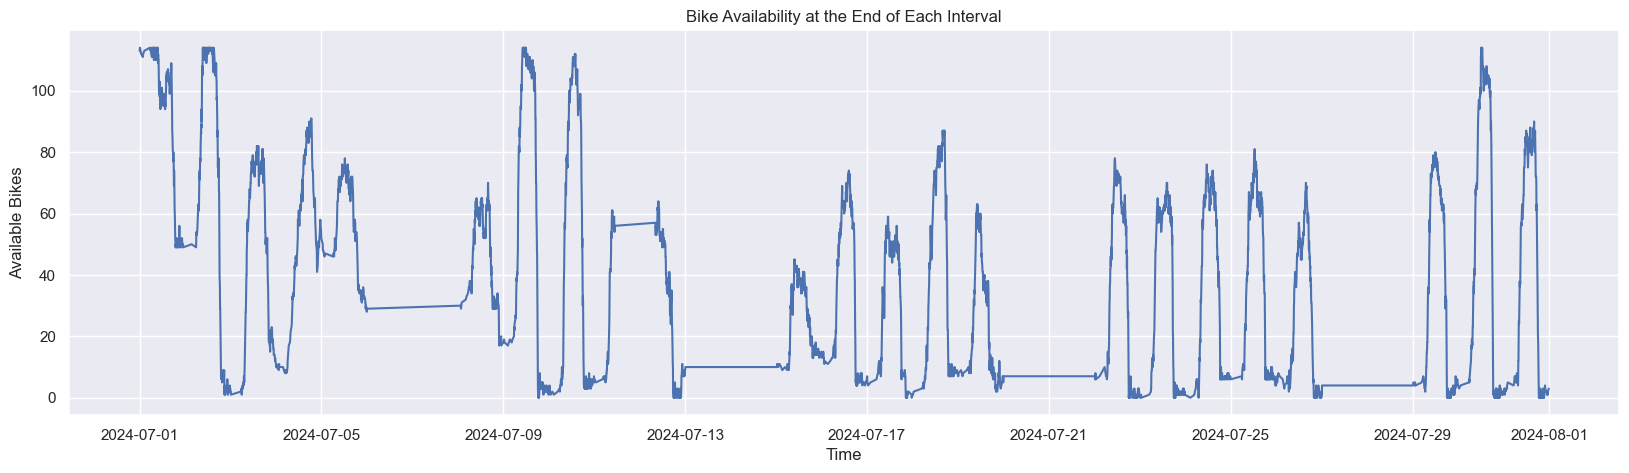

States with no outgoing transitions: [  1 106]
All rows sum to 1.
Min value: 0.0, at index: 1
Max value: 0.534, at index: 114
All rows sum to 1.
Min value: 0.0, at index: 16
Max value: 0.273, at index: 0


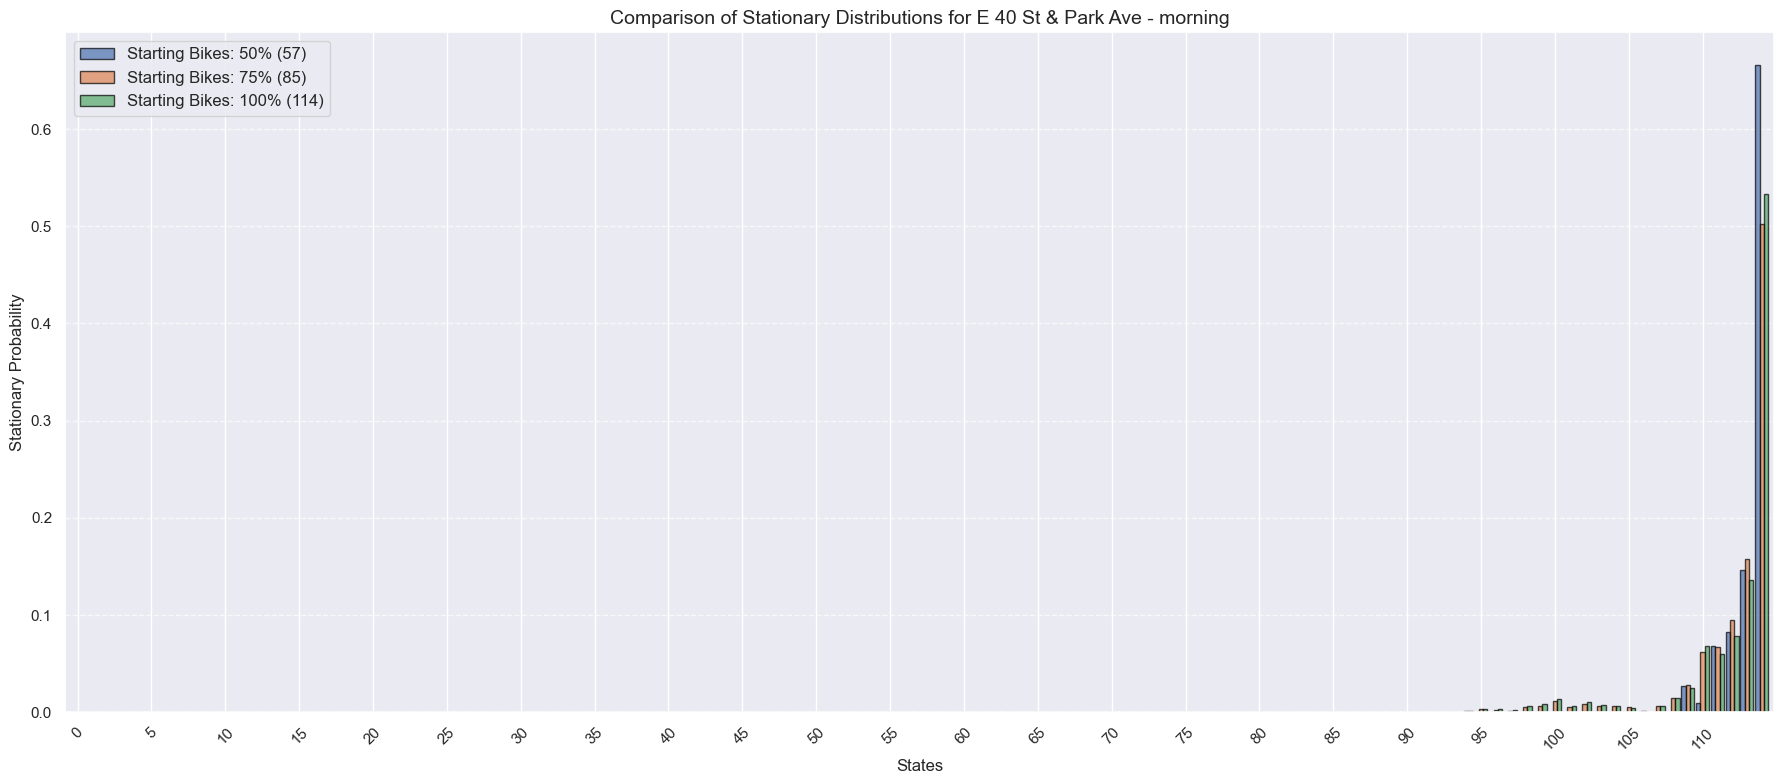

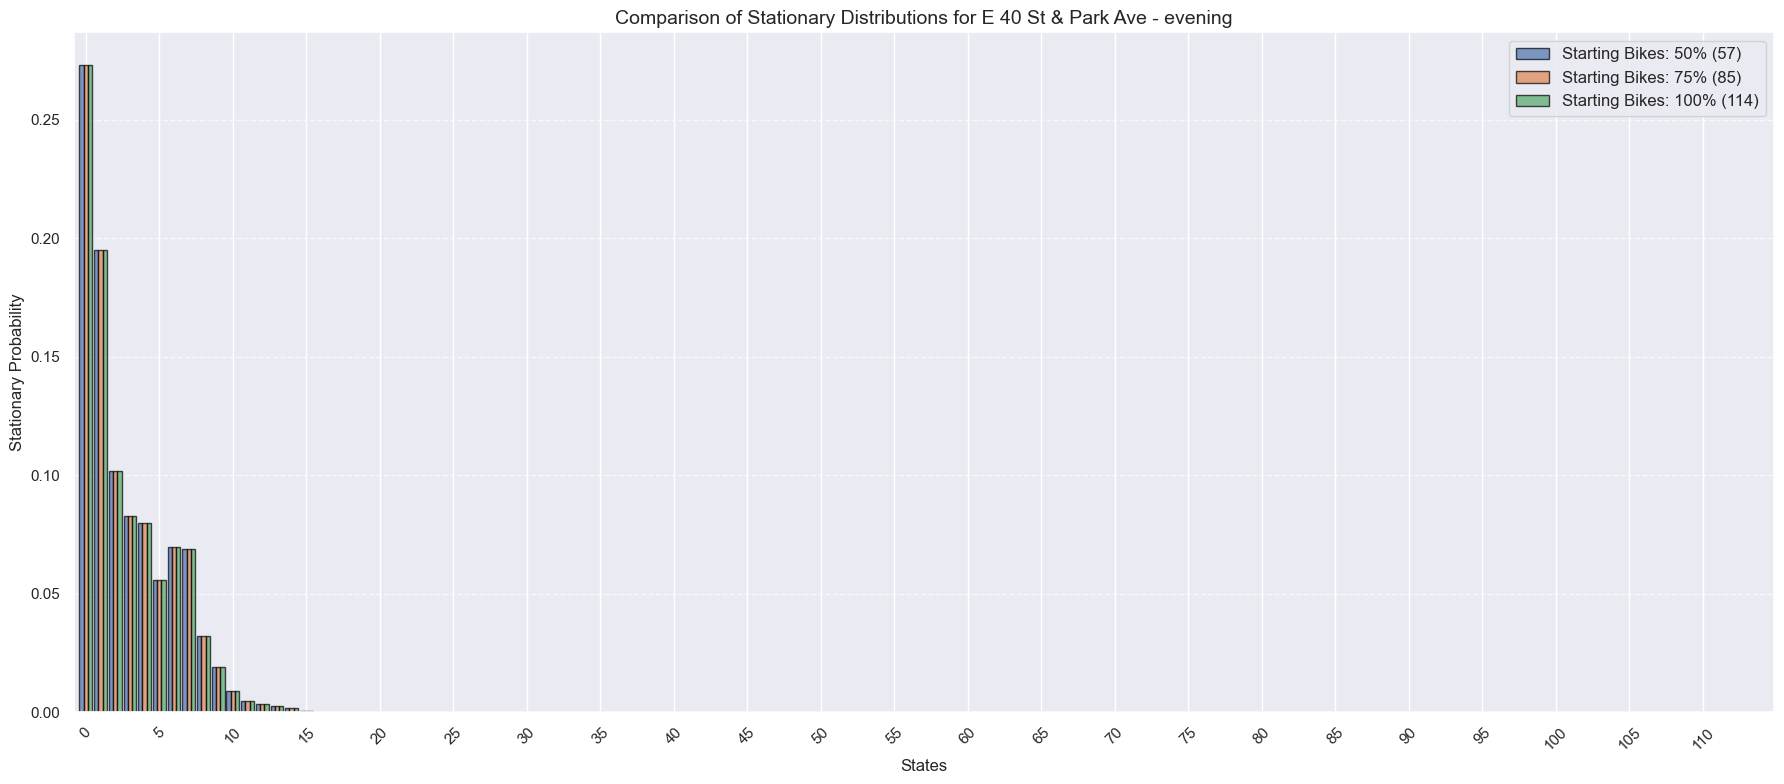

In [67]:
station = 'E 40 St & Park Ave'
capacity = 114
starting_percentages = [0.5, 0.75, 1.0]  # Starting percentages to analyze

gen_stat_plot(station, capacity, starting_percentages)